<a href="https://colab.research.google.com/github/TecnoBinaria/Challenge-Telecom-X-/blob/main/Copia_de_Challenge_Telecom_X_EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracción

In [ ]:
import os           # Manejo de rutas de archivos
import json         # Lectura de archivos JSON
from itertools import groupby  # Agrupación de secuencias ordenadas
import pandas as pd     # Análisis y manipulación de datos estructurados
import numpy as np      # Operaciones matemáticas y arrays
import seaborn as sns   # Visualización estadística avanzada
import matplotlib.pyplot as plt  # Visualización base y personalización
import matplotlib.ticker as mtick # Formateo de ejes en gráficos
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

In [ ]:
if isinstance(data, list) and len(data) > 0:
    df_original = pd.DataFrame(data)
else:
    raise ValueError("El archivo JSON está vacío o no tiene la estructura esperada.")

print(f"\nDimensiones del DataFrame original: {df_original.shape} (filas, columnas)")


Dimensiones del DataFrame original: (7267, 6) (filas, columnas)


In [ ]:
df_original = pd.DataFrame(data)
print("Tipo de 'data':", type(data))

print("Primer registro sin formato:")
print(data[0])

print("\nEstructura detallada del primer cliente (formato JSON):")
print(json.dumps(data[0], indent=4))

Tipo de 'data': <class 'list'>
Primer registro sin formato:
{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

Estructura detallada del primer cliente (formato JSON):
{
    "customerID": "0002-ORFBO",
    "Churn": "No",
    "customer": {
        "gender": "Female",
        "SeniorCitizen": 0,
        "Partner": "Yes",
        "Dependents": "Yes",
        "tenure": 9
    },
    "phone": {
        "PhoneService": "Yes",
        "MultipleLines": "No"
    },
    "internet": {
        "InternetService": "DSL",
     

In [ ]:
# Inspeccionar las 5 primeras filas
df_original.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Ver las columnas
df_original.columns



Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
# Tipos de datos del df_original
print(df_original.dtypes)


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [ ]:
# Info del df_original
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [ ]:
# Imprimir resumen estadístico
print("\nResumen estadístico:")
print(df_original.describe(include='all'))


Resumen estadístico:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                           

In [ ]:
#Nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df_original.isnull().sum())

nulos = df_original.isnull().sum()
print(nulos[nulos > 0])


Cantidad de valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
Series([], dtype: int64)


In [ ]:
def detectar_subcolumnas(df):
    subcolumnas = []
    for columna in df.columns:
        valor = df.loc[0, columna]
        if isinstance(valor, dict):
            subcolumnas.append(columna)
    return subcolumnas

def mostrar_subcolumnas(df, subcolumnas):
    for columna in subcolumnas:
        valor = df.loc[0, columna]
        if isinstance(valor, dict):
            print(f"\nColumna compuesta detectada: '{columna}'")
            print(f"Subcolumnas disponibles dentro de '{columna}':")
            for subcolumna in valor.keys():
                print(f"{columna}.{subcolumna}")
        else:
            print(f"\nColumna '{columna}' no contiene un diccionario en la fila 0.")

# Uso:
subcolumnas = detectar_subcolumnas(df_original)
mostrar_subcolumnas(df_original, subcolumnas)

# customer, phone, internet y account


Columna compuesta detectada: 'customer'
Subcolumnas disponibles dentro de 'customer':
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure

Columna compuesta detectada: 'phone'
Subcolumnas disponibles dentro de 'phone':
phone.PhoneService
phone.MultipleLines

Columna compuesta detectada: 'internet'
Subcolumnas disponibles dentro de 'internet':
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies

Columna compuesta detectada: 'account'
Subcolumnas disponibles dentro de 'account':
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges


#🔧 Transformación

In [ ]:
#copia del DataFrame original
df_transformado = df_original.copy()

In [ ]:
#columnas que contienen diccionarios
def detectar_columnas_diccionario(df):
    return [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]

# Detectar columnas anidadas
columnas_con_dict = detectar_columnas_diccionario(df_original)
print("Columnas con estructuras tipo diccionario detectadas:", columnas_con_dict)

Columnas con estructuras tipo diccionario detectadas: ['customer', 'phone', 'internet', 'account']


In [ ]:
# Lista de columnas detectadas en exploracion
columnas_con_dict = ['customer', 'phone', 'internet', 'account']

# Expandir columnas
for columna in columnas_con_dict:
    columnas_expandida = pd.json_normalize(df_transformado[columna])
    columnas_expandida.columns = [f"{columna}.{subcol}" for subcol in columnas_expandida.columns]

    df_transformado = pd.concat([df_transformado, columnas_expandida], axis=1)
    df_transformado.drop(columns=[columna], inplace=True)

# Mostrar columnas
print("Columnas después de desanidar:")
print(df_transformado.columns)

Columnas después de desanidar:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [ ]:
#Reemplazar puntos por guiones bajos en nombres de columnas
df_transformado.columns = df_transformado.columns.str.replace('.', '_')

In [ ]:
#dentificar todas las columnas expandidas generadas para limpiar filas con nulos
columnas_expandidas = []
for col in columnas_con_dict:
    columnas_expandidas.extend([c for c in df_transformado.columns if c.startswith(col + '_')])

# Eliminar filas que tengan valores nulos en alguna de las columnas expandidas
df_transformado = df_transformado.dropna(subset=columnas_expandidas)
print(f"Filas restantes después de eliminar nulos en columnas anidadas: {df_transformado.shape[0]}")

Filas restantes después de eliminar nulos en columnas anidadas: 7267


In [ ]:
#Verificar nulos en columnas anidadas
for col in columnas_con_dict:
    nulos = df_original[col].isnull().sum()
    print(f"{col}: {nulos} valores nulos")

customer: 0 valores nulos
phone: 0 valores nulos
internet: 0 valores nulos
account: 0 valores nulos


In [ ]:
#Info básica
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
#Mostrar columnas y tipos
print(df_transformado.columns)
print(df_transformado.dtypes)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')
customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup        

In [ ]:
#Contar duplicados
duplicados = df_transformado.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [ ]:
#Eliminar duplicados si existen
if duplicados > 0:
    df_transformado = df_transformado.drop_duplicates()
    print("Duplicados eliminados.")
else:
    print("No se encontraron duplicados.")

No se encontraron duplicados.


In [ ]:
#Verificar valores nulos en todo el DataFrame
nulos = df_transformado.isnull().sum()
print("Valores nulos por columna:\n", nulos)
print(f"Total de filas en df_transformado: {df_transformado.shape[0]}")

Valores nulos por columna:
 customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64
Total de filas en df_transformado: 7267


In [ ]:
#Convertir columnas numéricas que quedaron como texto
df_transformado['account_Charges_Monthly'] = pd.to_numeric(df_transformado['account_Charges_Monthly'], errors='coerce')
df_transformado['account_Charges_Total'] = pd.to_numeric(df_transformado['account_Charges_Total'], errors='coerce')

print("Tipos de datos después de la conversión:")
print(df_transformado[['account_Charges_Monthly', 'account_Charges_Total']].dtypes)

print("\nValores de ejemplo:")
print(df_transformado[['account_Charges_Monthly', 'account_Charges_Total']].head())

Tipos de datos después de la conversión:
account_Charges_Monthly    float64
account_Charges_Total      float64
dtype: object

Valores de ejemplo:
   account_Charges_Monthly  account_Charges_Total
0                     65.6                 593.30
1                     59.9                 542.40
2                     73.9                 280.85
3                     98.0                1237.85
4                     83.9                 267.40


In [ ]:
#Crear columna derivada: cuentas diarias (promedio mensual / 30 días)
df_transformado['Cuentas_Diarias'] = df_transformado['account_Charges_Monthly'] / 30

In [ ]:
#Limpiar valores vacíos o erróneos en la columna 'Churn' y eliminar esas filas
df_transformado['Churn'] = df_transformado['Churn'].replace(['', ' ', 'None'], np.nan)

In [ ]:
#Eliminar nulos en 'Churn'
df_transformado = df_transformado.dropna(subset=['Churn'])

In [ ]:
#Ver cantidad de nulos
nulos_totales = df_transformado.isnull().sum()
nulos_porcentaje = (nulos_totales / len(df_transformado)) * 100
nulos_df = pd.DataFrame({'Nulos': nulos_totales, 'Porcentaje': nulos_porcentaje})
nulos_df = nulos_df[nulos_df['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

print("Resumen de columnas con valores nulos:")
print(nulos_df)

Resumen de columnas con valores nulos:
                       Nulos  Porcentaje
account_Charges_Total     11    0.156183


In [ ]:
#Mostrar shape y columnas
filas, columnas = df_transformado.shape
shape_texto = f"{filas} filas x {columnas} columnas"

tabla_resumen = pd.DataFrame({
    "Columnas disponibles": df_transformado.columns.tolist(),
    "Shape del DataFrame": [shape_texto] + [""] * (len(df_transformado.columns) - 1)
})


display(tabla_resumen)

,Columnas disponibles,Shape del DataFrame
0,customerID,7043 filas x 22 columnas
1,Churn,
2,customer_gender,
3,customer_SeniorCitizen,
4,customer_Partner,
5,customer_Dependents,
6,customer_tenure,
7,phone_PhoneService,
8,phone_MultipleLines,
9,internet_InternetService,


In [ ]:
#Ordenar columnas para mejor visualización agrupándolas por prefijo
columnas_ordenadas = sorted(df_transformado.columns, key=lambda x: x.split('_')[0])

print("Columnas en df_limpio (agrupadas por categoría):\n")
for i, col in enumerate(columnas_ordenadas, 1):
    print(f"{i:2d}. {col}")

Columnas en df_limpio (agrupadas por categoría):

 1. Churn
 2. Cuentas_Diarias
 3. account_Contract
 4. account_PaperlessBilling
 5. account_PaymentMethod
 6. account_Charges_Monthly
 7. account_Charges_Total
 8. customer_gender
 9. customer_SeniorCitizen
10. customer_Partner
11. customer_Dependents
12. customer_tenure
13. customerID
14. internet_InternetService
15. internet_OnlineSecurity
16. internet_OnlineBackup
17. internet_DeviceProtection
18. internet_TechSupport
19. internet_StreamingTV
20. internet_StreamingMovies
21. phone_PhoneService
22. phone_MultipleLines


In [ ]:
#Guardar una copia limpia para análisis posteriores
df_limpio = df_transformado.copy()

In [ ]:
#Guardar DataFrame limpio como CSV para uso futuro
try:
    df_limpio.to_csv('TelecomX_df_limpio.csv', index=False)
    print("Archivo guardado como 'TelecomX_df_limpio.csv'")
except Exception as e:
    print(f"Error al guardar CSV: {e}")

Archivo guardado como 'TelecomX_df_limpio.csv'


In [ ]:
#Columnas binarias con valores Yes y No
#Columnas no binarias, indicando cuántos valores únicos tienen y mostrando ejemplos
# Seleccionar columnas tipo objeto (categóricas)
columnas_objeto = df_limpio.select_dtypes(include='object').columns

binarias = []
no_binarias = []

# Identificar variables binarias con valores 'Yes' y 'No'
for col in columnas_objeto:
    valores = sorted(df_limpio[col].dropna().unique())
    if set(valores) == {'No', 'Yes'}:
        binarias.append((col, valores))
    else:
        no_binarias.append((col, valores))

# Mostrar columnas binarias
print("Columnas con valores únicos 'Yes' y 'No':\n" + "-"*50)
for col, vals in binarias:
    print(f"\U0001F7E2 {col:<25}: {vals}")

# Mostrar columnas no binarias
print("\nColumnas NO binarias:\n" + "-"*50)
for col, vals in no_binarias:
    cantidad = len(vals)
    ejemplos = ', '.join(map(str, vals[:3]))
    extra = f"... (+{cantidad - 4})" if cantidad > 4 else ""
    print(f"\U0001F534 {col:<25}: {cantidad} únicos (Ej: {ejemplos} {extra})")

Columnas con valores únicos 'Yes' y 'No':
--------------------------------------------------
🟢 Churn                    : ['No', 'Yes']
🟢 customer_Partner         : ['No', 'Yes']
🟢 customer_Dependents      : ['No', 'Yes']
🟢 phone_PhoneService       : ['No', 'Yes']
🟢 account_PaperlessBilling : ['No', 'Yes']

Columnas NO binarias:
--------------------------------------------------
🔴 customerID               : 7043 únicos (Ej: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ ... (+7039))
🔴 customer_gender          : 2 únicos (Ej: Female, Male )
🔴 phone_MultipleLines      : 3 únicos (Ej: No, No phone service, Yes )
🔴 internet_InternetService : 3 únicos (Ej: DSL, Fiber optic, No )
🔴 internet_OnlineSecurity  : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_OnlineBackup    : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_DeviceProtection: 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_TechSupport     : 3 únicos (Ej: No, No internet service, Yes )
🔴 internet_StreamingTV     : 3 ún

In [ ]:
#Crear una copia para análisis binario (transformar Yes/No a 1/0)
df_binario = df_limpio.copy()

In [ ]:
#Transformar variable objetivo 'Churn'
# Detectar valores no reconocidos en 'Churn'
valores_unicos = df_binario['Churn'].unique()
if pd.isnull(valores_unicos).any():
    print("Algunos valores de 'Churn' no fueron reconocidos y se asignaron como NaN.")
    print("Valores únicos después del mapeo:", valores_unicos)

In [ ]:
col = 'Churn'

# Limpiar texto
df_binario[col] = df_binario[col].astype(str).str.strip().str.capitalize()

# Verificar si hay valores inesperados
valores_esperados = {'Yes', 'No'}
valores_actuales = set(df_binario[col].unique())

valores_no_controlados = valores_actuales - valores_esperados

if valores_no_controlados:
    print(f"Atención: Se encontraron valores no válidos en '{col}': {valores_no_controlados}")

else:
    # Mapear
    df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
    print(f"'{col}' mapeada correctamente. Valores únicos: {df_binario[col].unique()}")

'Churn' mapeada correctamente. Valores únicos: [0 1]


In [ ]:
#Variables binarias que queremos transformar
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Aplicar transformación binaria 1/0
for col in columnas_binarias:
    if col in df_binario.columns:
        df_binario[col] = df_binario[col].str.strip().str.capitalize()
        df_binario[col] = df_binario[col].map({'Yes': 1, 'No': 0})
        nulos = df_binario[col].isnull().sum()
        if nulos > 0:
            print(f"Columna '{col}' tiene {nulos} valores no reconocidos tras la conversión.")
    else:
        print(f"Advertencia: la columna '{col}' no existe en df_binario.")


# Verificación
print("\nTransformación de variables binarias completada.\nValores únicos por columna (esperado: [0, 1]):\n")
for col in columnas_binarias:
    if col in df_binario.columns:
        valores_unicos = df_binario[col].dropna().unique()
        print(f"   - {col}: {valores_unicos}")

Columna 'phone_MultipleLines' tiene 682 valores no reconocidos tras la conversión.
Columna 'internet_OnlineSecurity' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_OnlineBackup' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_DeviceProtection' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_TechSupport' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_StreamingTV' tiene 1526 valores no reconocidos tras la conversión.
Columna 'internet_StreamingMovies' tiene 1526 valores no reconocidos tras la conversión.

Transformación de variables binarias completada.
Valores únicos por columna (esperado: [0, 1]):

   - customer_Partner: [1 0]
   - customer_Dependents: [1 0]
   - phone_PhoneService: [1 0]
   - phone_MultipleLines: [0. 1.]
   - internet_OnlineSecurity: [0. 1.]
   - internet_OnlineBackup: [1. 0.]
   - internet_DeviceProtection: [0. 1.]
   - internet_TechSupport: [1. 0.]
   - internet_Streami

In [ ]:
#Verifica si hay algún valor NaN en las columnas binarias
columnas_binarias = [
    'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

df_transformado[columnas_binarias].isna().sum()

,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,0
phone_MultipleLines,0
internet_OnlineSecurity,0
internet_OnlineBackup,0
internet_DeviceProtection,0
internet_TechSupport,0
internet_StreamingTV,0
internet_StreamingMovies,0


In [ ]:
#Guardar CSV listo para análisis con variables binarias
try:
    df_binario.to_csv("TelecomX_df_binario.csv", index=False)
    print("Archivo 'TelecomX_df_binario.csv' guardado correctamente.")
except Exception as e:
    print(f"Error al guardar CSV binario: {e}")

Archivo 'TelecomX_df_binario.csv' guardado correctamente.


In [ ]:
#Crear copia de respaldo del DataFrame original
try:
    df_original_copy = df_original.copy()
    print("Copia de respaldo 'df_original_copy' creada correctamente.")
except NameError as e:
    print("Error:", e)
    print(" df_original no está definido.")
    print("Solución: Ejecuta la celda de EXTRACCIÓN donde se define df_original.")
    print("   Ejemplo: df_original = pd.read_json('TelecomX_Data.json')")

Copia de respaldo 'df_original_copy' creada correctamente.


In [ ]:
#Verificación de dimensiones
print("Diagnóstico final de transformación:")
print(f"- Registros originales: {df_original_copy.shape[0]}")
print(f"- Registros después de transformación: {df_transformado.shape[0]}")
print(f"- Total de registros eliminados: {df_original_copy.shape[0] - df_transformado.shape[0]}")

Diagnóstico final de transformación:
- Registros originales: 7267
- Registros después de transformación: 7043
- Total de registros eliminados: 224


In [ ]:
#Identificar registros eliminados según customerID
ids_transformado = set(df_transformado['customerID'])
df_eliminados = df_original_copy[~df_original_copy['customerID'].isin(ids_transformado)]

print(f"\nRegistros eliminados: {df_eliminados.shape[0]}")
display(df_eliminados.head())


Registros eliminados: 224


,customerID,Churn,customer,phone,internet,account
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [ ]:
#Ver columnas que tenían nulos
print("Nulos por columna en registros eliminados:")
print(df_eliminados.isna().sum())

Nulos por columna en registros eliminados:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [ ]:
#Revisión de la Columna 'Churn' en los Registros Eliminados
print("\nValores únicos de 'Churn' en registros eliminados:")
print(df_eliminados['Churn'].unique())


Valores únicos de 'Churn' en registros eliminados:
['']


In [ ]:
#Confirmación específica de causa de eliminación
if all(df_eliminados['Churn'] == ''):
    print("\n \U0001F7E2 Confirmación: Todos los registros eliminados tienen 'Churn' vacío.")
else:
    print("\n U+1F7E1 Advertencia: Hay registros eliminados con valores distintos de '' en 'Churn'.")


 🟢 Confirmación: Todos los registros eliminados tienen 'Churn' vacío.


In [ ]:
#Exploración de Contenido en Subcolumnas (customer, phone, internet, account)
for col in ['customer', 'phone', 'internet', 'account']:
    print(f"\nContenido típico de columna '{col}' en registros eliminados:")
    print(df_eliminados[col].head(1).values)


Contenido típico de columna 'customer' en registros eliminados:
[{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}]

Contenido típico de columna 'phone' en registros eliminados:
[{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}]

Contenido típico de columna 'internet' en registros eliminados:
[{'InternetService': 'Fiber optic', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}]

Contenido típico de columna 'account' en registros eliminados:
[{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Bank transfer (automatic)', 'Charges': {'Monthly': 79.0, 'Total': '929.3'}}]


# 📊 Carga y análisis

In [ ]:
print("\nAnálisis Descriptivo:")
# Seleccionar solo las columnas numéricas para el análisis descriptivo
df_numeric = df_limpio.select_dtypes(include=np.number)
print(df_numeric.describe().to_markdown(numalign="left", stralign="left"))


Análisis Descriptivo:
|       | customer_SeniorCitizen   | customer_tenure   | account_Charges_Monthly   | account_Charges_Total   | Cuentas_Diarias   |
|:------|:-------------------------|:------------------|:--------------------------|:------------------------|:------------------|
| count | 7043                     | 7043              | 7043                      | 7032                    | 7043              |
| mean  | 0.162147                 | 32.3711           | 64.7617                   | 2283.3                  | 2.15872           |
| std   | 0.368612                 | 24.5595           | 30.09                     | 2266.77                 | 1.003             |
| min   | 0                        | 0                 | 18.25                     | 18.8                    | 0.608333          |
| 25%   | 0                        | 9                 | 35.5                      | 401.45                  | 1.18333           |
| 50%   | 0                        | 29                | 70.

<ipython-input-79-3021192025>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_limpio, palette='viridis')


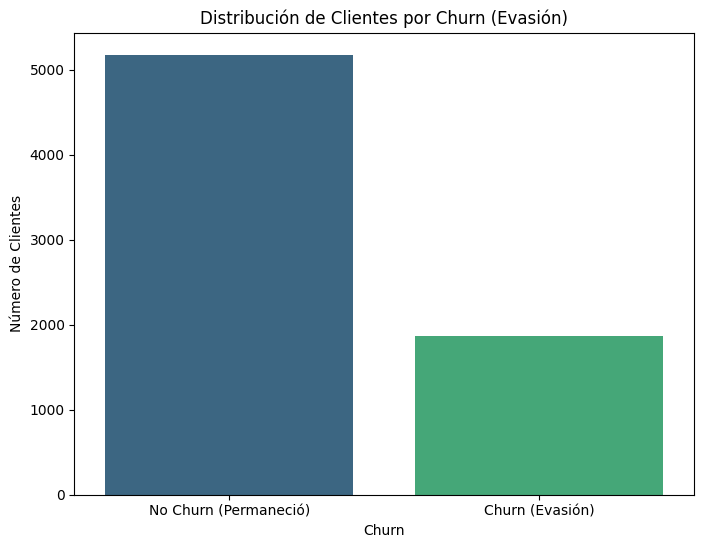


Proporción de Clientes por Churn:
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


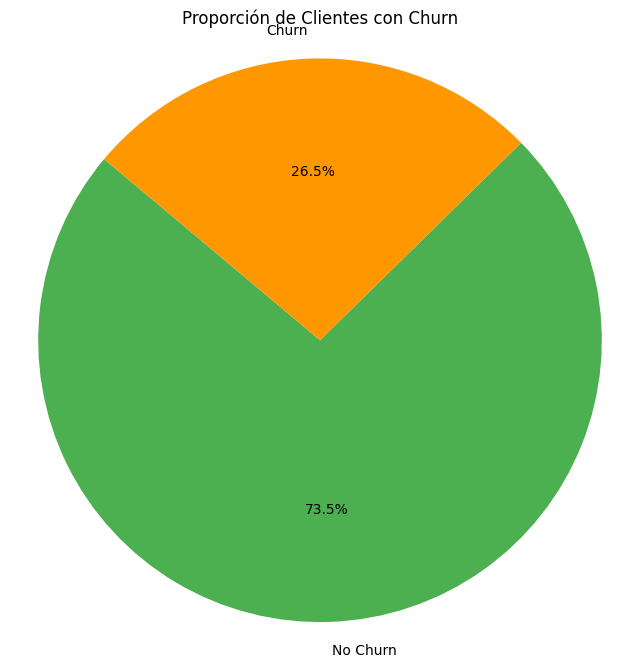

In [ ]:
# Análisis de la variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_limpio, palette='viridis')
plt.title('Distribución de Clientes por Churn (Evasión)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn (Permaneció)', 'Churn (Evasión)'])
plt.show()

# Calcular la proporción
churn_counts = df_limpio['Churn'].value_counts()
churn_proportions = churn_counts / len(df_limpio)

print("\nProporción de Clientes por Churn:")
print(churn_proportions)

plt.figure(figsize=(8, 8))
plt.pie(churn_proportions, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['#4CAF50', '#FF9800'], startangle=140)
plt.title('Proporción de Clientes con Churn')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

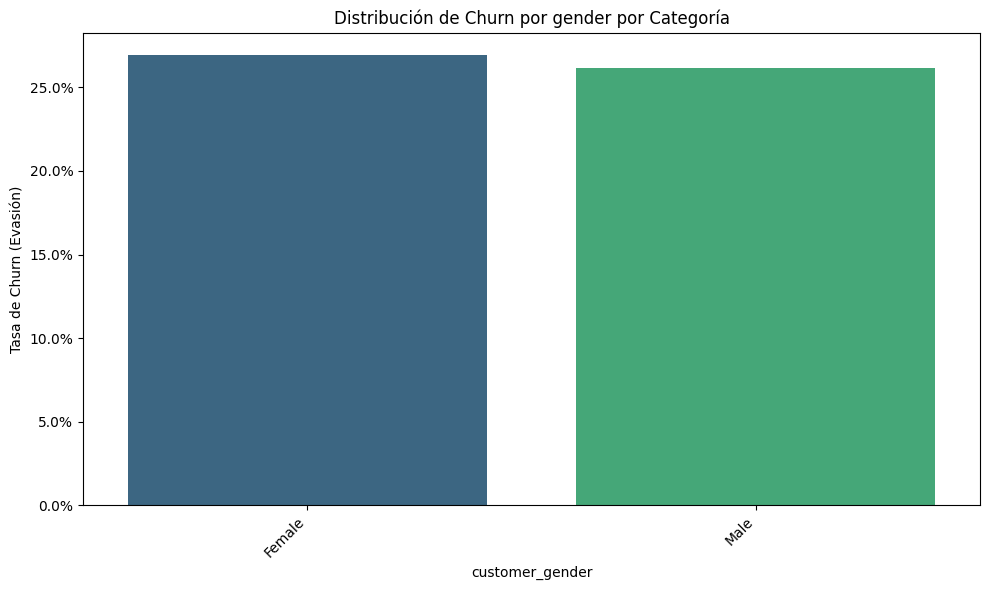


Resumen de Tasa de Churn por customer_gender:


'| customer_gender   | Total      | Churn_Rate   |\n|:------------------|:-----------|:-------------|\n| Female            | 348800.00% | 26.92%       |\n| Male              | 355500.00% | 26.16%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


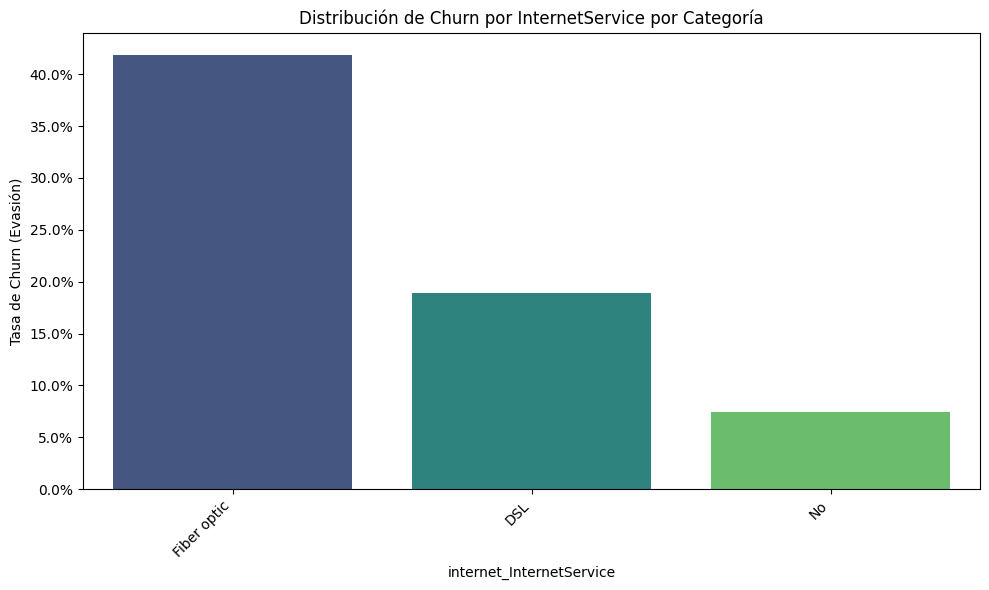


Resumen de Tasa de Churn por internet_InternetService:


'| internet_InternetService   | Total      | Churn_Rate   |\n|:---------------------------|:-----------|:-------------|\n| Fiber optic                | 309600.00% | 41.89%       |\n| DSL                        | 242100.00% | 18.96%       |\n| No                         | 152600.00% | 7.40%        |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


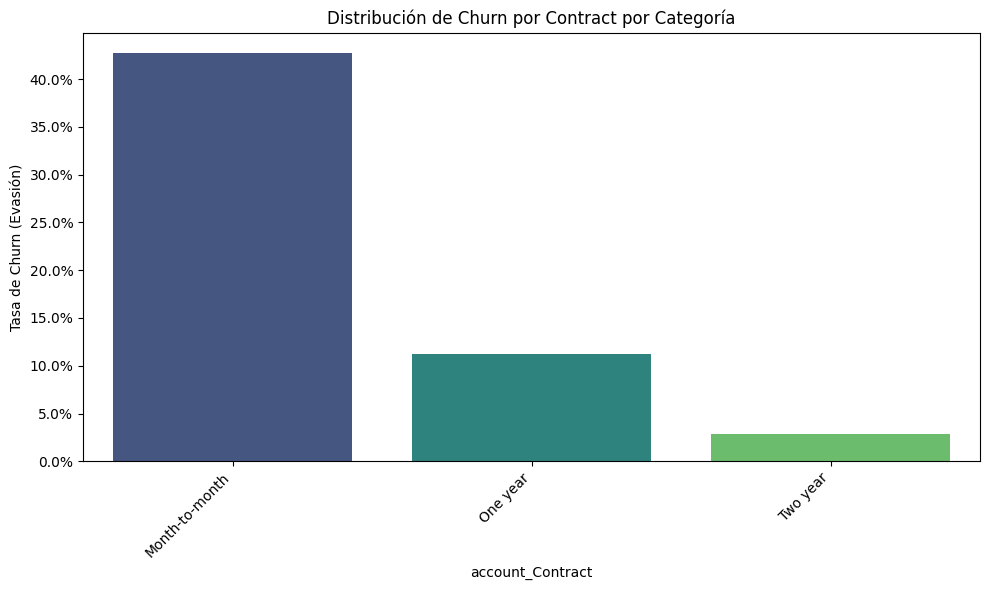


Resumen de Tasa de Churn por account_Contract:


'| account_Contract   | Total      | Churn_Rate   |\n|:-------------------|:-----------|:-------------|\n| Month-to-month     | 387500.00% | 42.71%       |\n| One year           | 147300.00% | 11.27%       |\n| Two year           | 169500.00% | 2.83%        |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


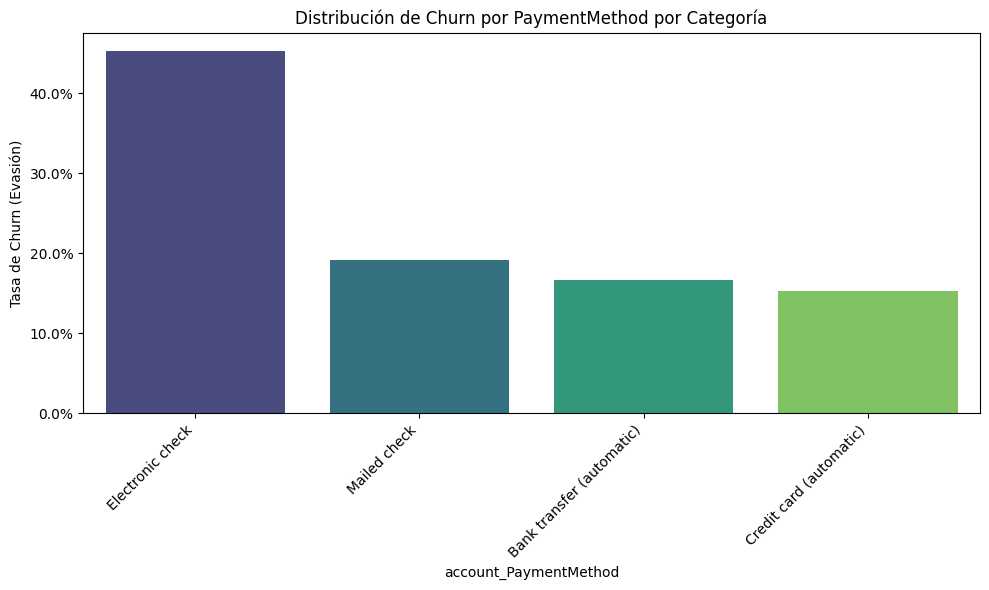


Resumen de Tasa de Churn por account_PaymentMethod:


'| account_PaymentMethod     | Total      | Churn_Rate   |\n|:--------------------------|:-----------|:-------------|\n| Electronic check          | 236500.00% | 45.29%       |\n| Mailed check              | 161200.00% | 19.11%       |\n| Bank transfer (automatic) | 154400.00% | 16.71%       |\n| Credit card (automatic)   | 152200.00% | 15.24%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


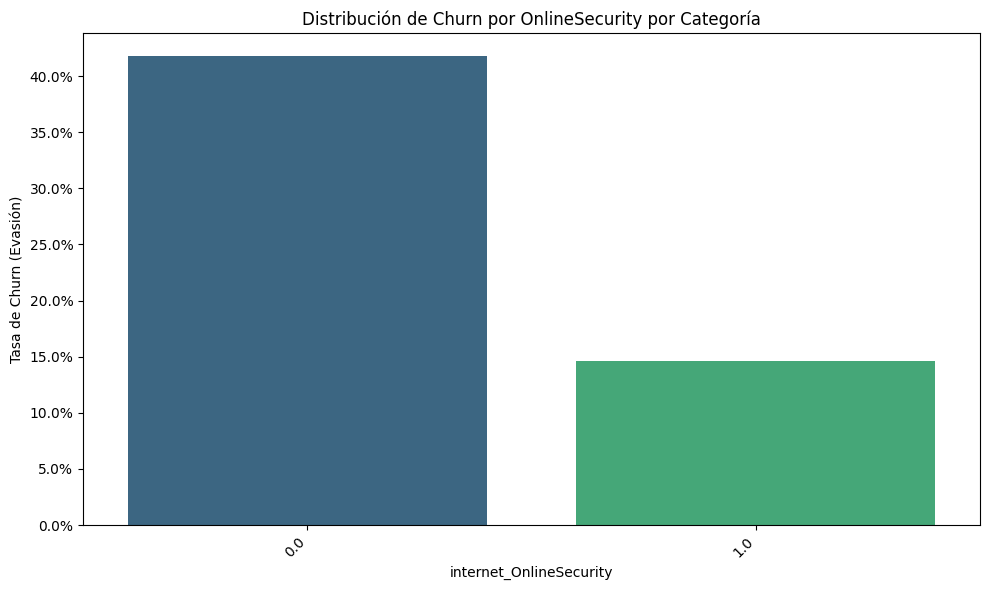


Resumen de Tasa de Churn por internet_OnlineSecurity:


'| internet_OnlineSecurity   | Total      | Churn_Rate   |\n|:--------------------------|:-----------|:-------------|\n| 0.00%                     | 349800.00% | 41.77%       |\n| 100.00%                   | 201900.00% | 14.61%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


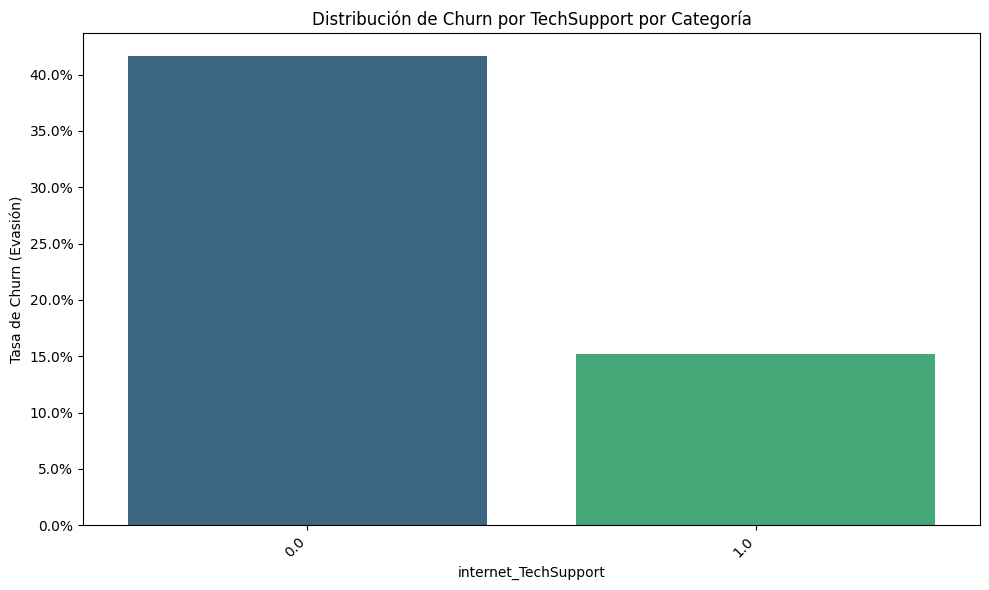


Resumen de Tasa de Churn por internet_TechSupport:


'| internet_TechSupport   | Total      | Churn_Rate   |\n|:-----------------------|:-----------|:-------------|\n| 0.00%                  | 347300.00% | 41.64%       |\n| 100.00%                | 204400.00% | 15.17%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


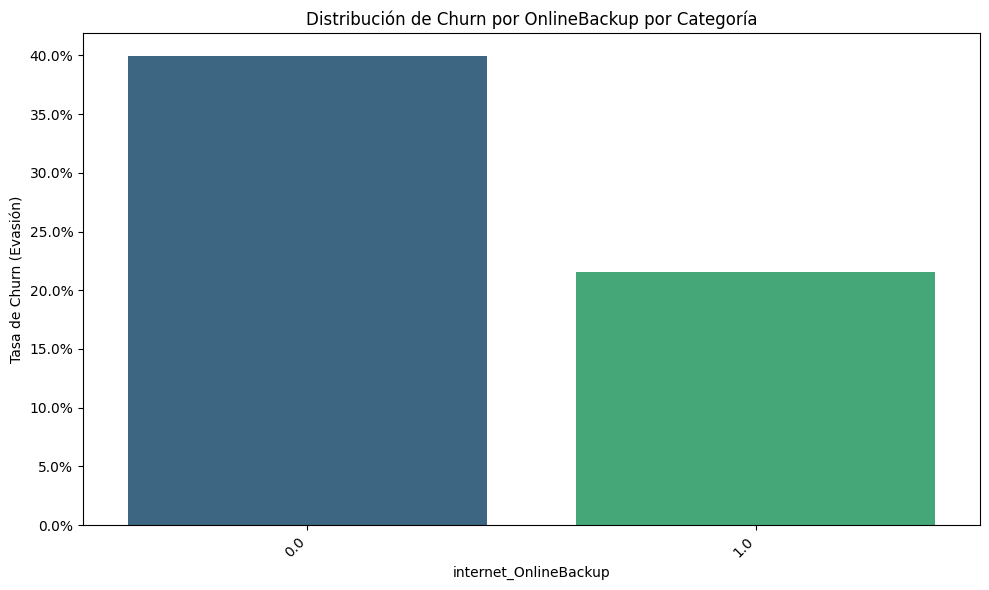


Resumen de Tasa de Churn por internet_OnlineBackup:


'| internet_OnlineBackup   | Total      | Churn_Rate   |\n|:------------------------|:-----------|:-------------|\n| 0.00%                   | 308800.00% | 39.93%       |\n| 100.00%                 | 242900.00% | 21.53%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


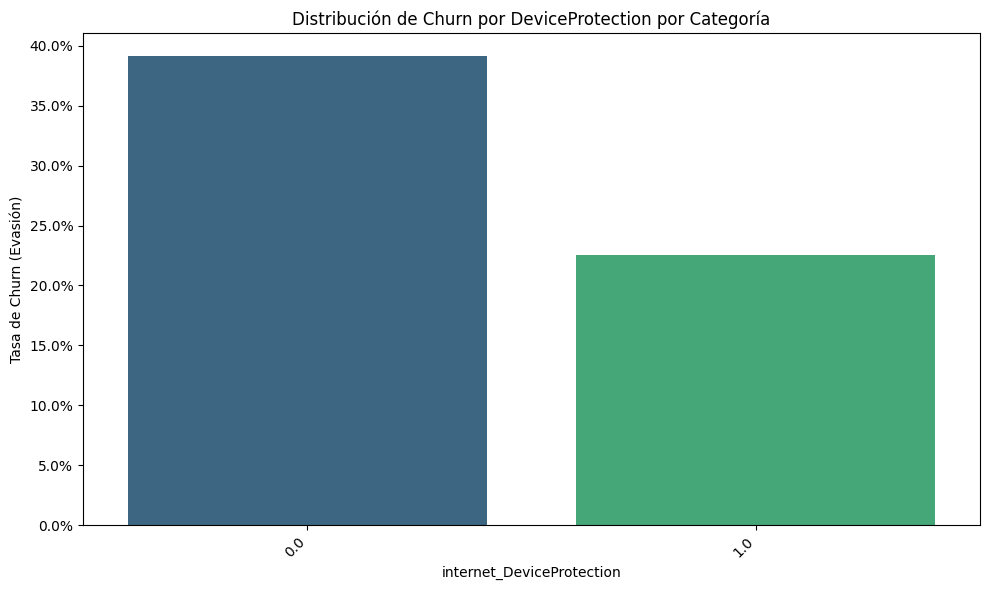


Resumen de Tasa de Churn por internet_DeviceProtection:


'| internet_DeviceProtection   | Total      | Churn_Rate   |\n|:----------------------------|:-----------|:-------------|\n| 0.00%                       | 309500.00% | 39.13%       |\n| 100.00%                     | 242200.00% | 22.50%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


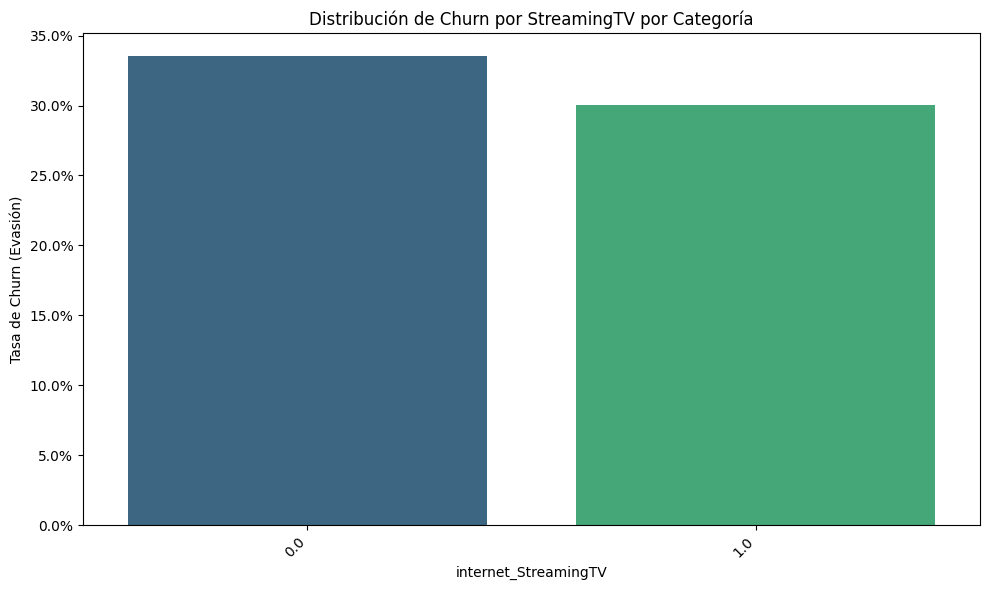


Resumen de Tasa de Churn por internet_StreamingTV:


'| internet_StreamingTV   | Total      | Churn_Rate   |\n|:-----------------------|:-----------|:-------------|\n| 0.00%                  | 281000.00% | 33.52%       |\n| 100.00%                | 270700.00% | 30.07%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


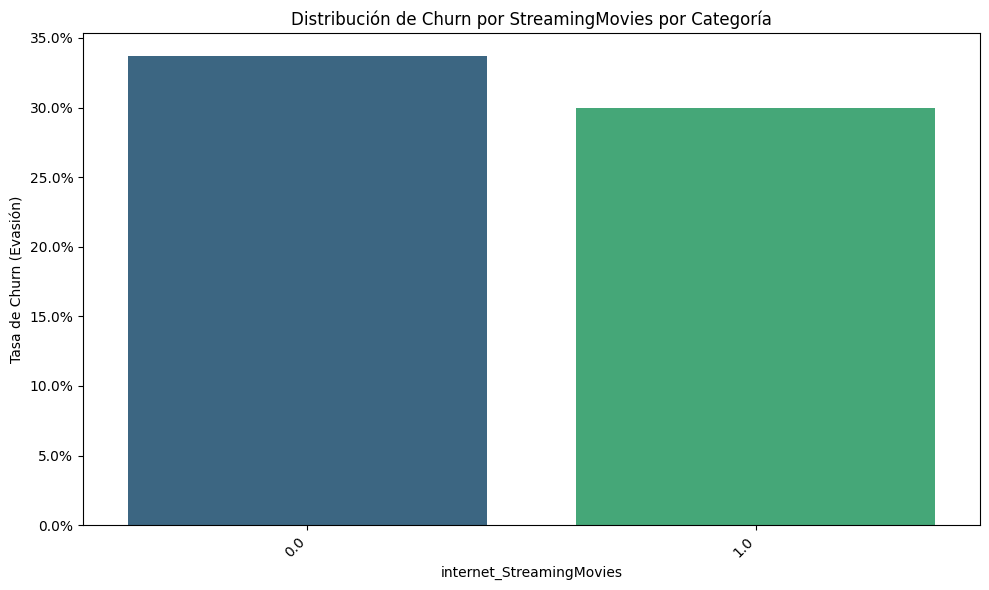


Resumen de Tasa de Churn por internet_StreamingMovies:


'| internet_StreamingMovies   | Total      | Churn_Rate   |\n|:---------------------------|:-----------|:-------------|\n| 0.00%                      | 278500.00% | 33.68%       |\n| 100.00%                    | 273200.00% | 29.94%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


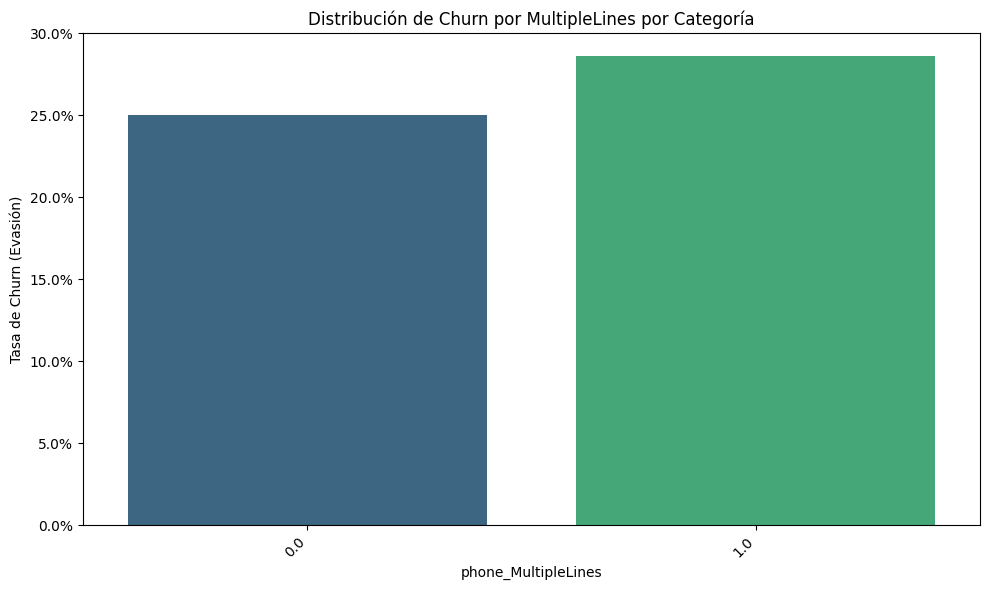


Resumen de Tasa de Churn por phone_MultipleLines:


'| phone_MultipleLines   | Total      | Churn_Rate   |\n|:----------------------|:-----------|:-------------|\n| 100.00%               | 297100.00% | 28.61%       |\n| 0.00%                 | 339000.00% | 25.04%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


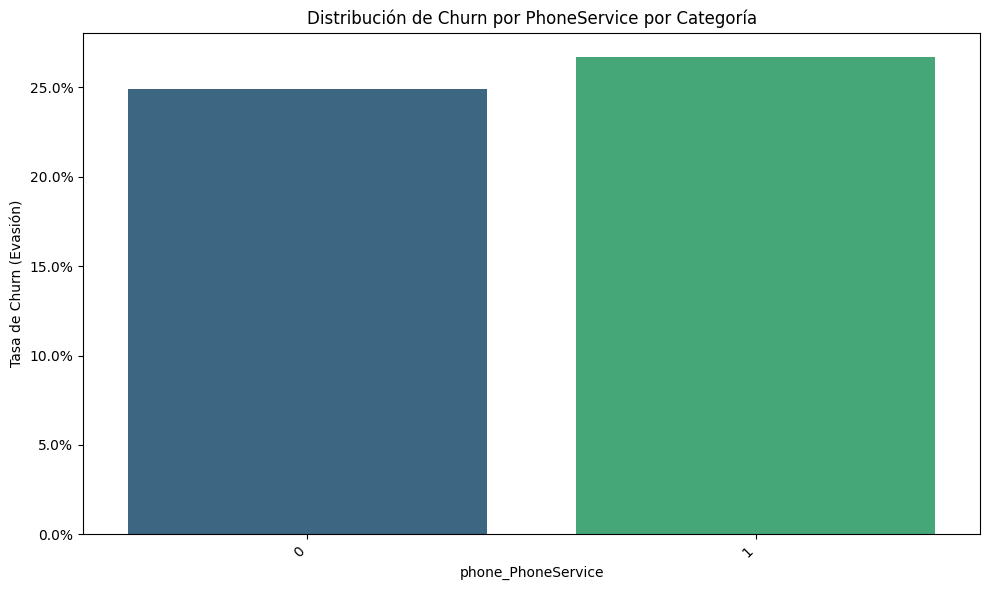


Resumen de Tasa de Churn por phone_PhoneService:


'| phone_PhoneService   | Total      | Churn_Rate   |\n|:---------------------|:-----------|:-------------|\n| 1                    | 636100.00% | 26.71%       |\n| 0                    | 68200.00%  | 24.93%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


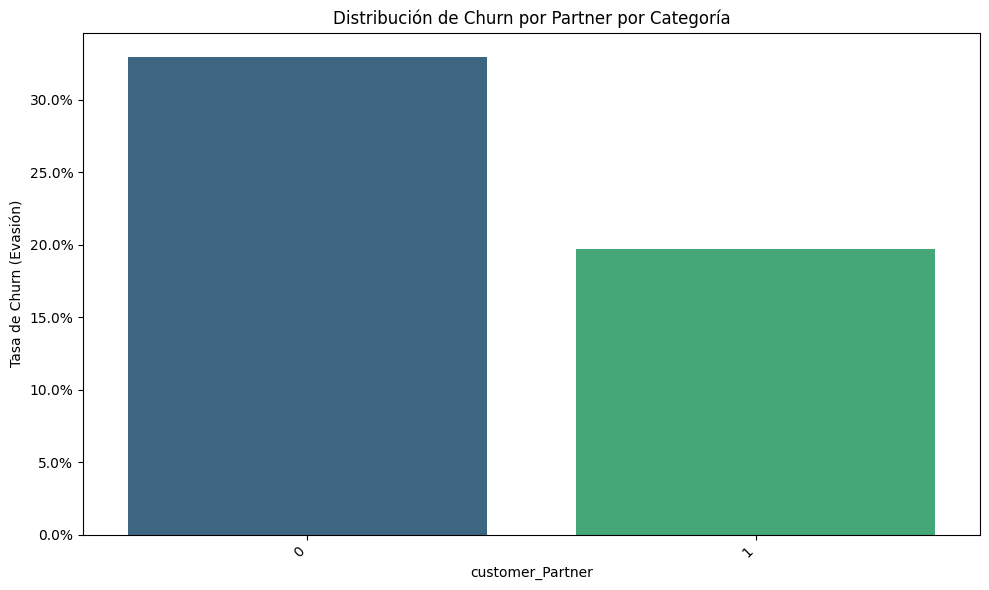


Resumen de Tasa de Churn por customer_Partner:


'| customer_Partner   | Total      | Churn_Rate   |\n|:-------------------|:-----------|:-------------|\n| 0                  | 364100.00% | 32.96%       |\n| 1                  | 340200.00% | 19.66%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


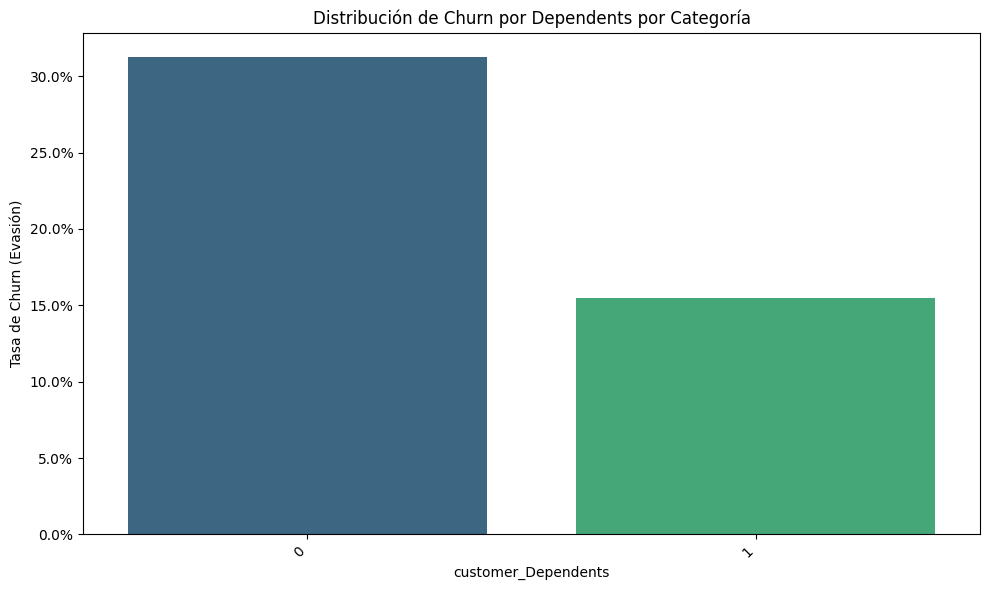


Resumen de Tasa de Churn por customer_Dependents:


'| customer_Dependents   | Total      | Churn_Rate   |\n|:----------------------|:-----------|:-------------|\n| 0                     | 493300.00% | 31.28%       |\n| 1                     | 211000.00% | 15.45%       |'

<ipython-input-80-2255734272>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')


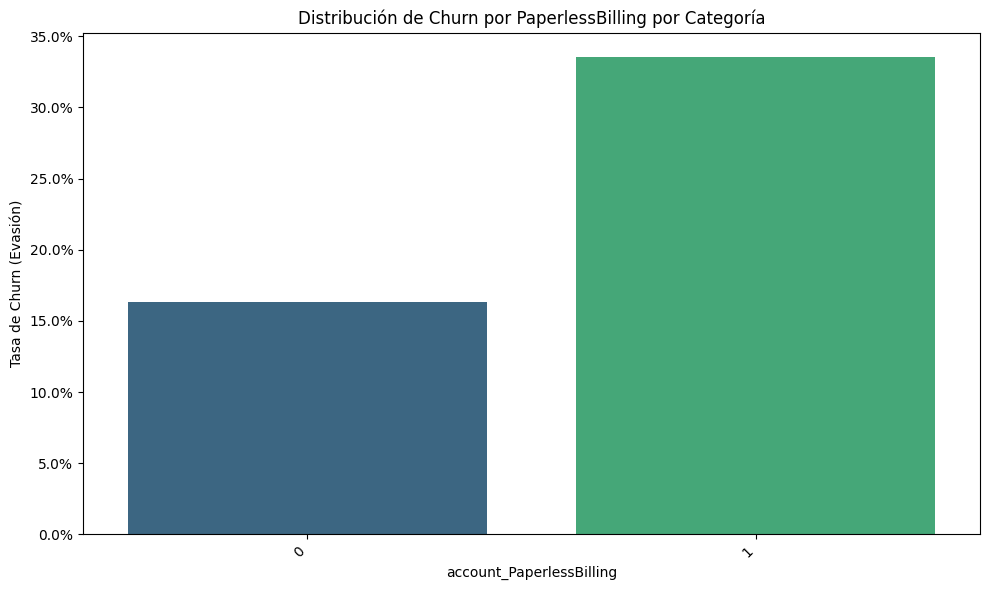


Resumen de Tasa de Churn por account_PaperlessBilling:


'| account_PaperlessBilling   | Total      | Churn_Rate   |\n|:---------------------------|:-----------|:-------------|\n| 1                          | 417100.00% | 33.57%       |\n| 0                          | 287200.00% | 16.33%       |'

In [ ]:

def analizar_evasion_por_categoria(df, columna_categoria, titulo):
    """
    Analiza la distribución de la evasión (Churn) para una variable categórica dada.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos, incluyendo la columna 'Churn'.
        columna_categoria (str): Nombre de la columna categórica a analizar.
        titulo (str): Título para el gráfico.
    """
    if columna_categoria not in df.columns:
        print(f"Advertencia: La columna '{columna_categoria}' no se encuentra en el DataFrame.")
        return
    if 'Churn' not in df.columns:
        print("Error: La columna 'Churn' no se encuentra en el DataFrame.")
        return

    # Asegurarse de que Churn es numérica (0 o 1)
    df_temp = df.copy()
    df_temp['Churn'] = df_temp['Churn'].astype(int)

    # Agrupar por la columna categórica y Churn, contar y normalizar
    churn_por_categoria = df_temp.groupby([columna_categoria, 'Churn']).size().unstack(fill_value=0)
    churn_por_categoria['Total'] = churn_por_categoria[0] + churn_por_categoria[1]
    churn_por_categoria['Churn_Rate'] = churn_por_categoria[1] / churn_por_categoria['Total']

    # Ordenar por tasa de Churn para mejor visualización
    churn_por_categoria = churn_por_categoria.sort_values(by='Churn_Rate', ascending=False)

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.barplot(x=churn_por_categoria.index, y='Churn_Rate', data=churn_por_categoria, palette='viridis')

    plt.title(f'{titulo} por Categoría')
    plt.xlabel(columna_categoria)
    plt.ylabel('Tasa de Churn (Evasión)')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.tight_layout()
    plt.show()

    print(f"\nResumen de Tasa de Churn por {columna_categoria}:")
    display(churn_por_categoria[['Total', 'Churn_Rate']].to_markdown(numalign="left", stralign="left", floatfmt=".2%"))


# Columnas categóricas relevantes para el análisis de evasión
columnas_categoricas = [
    'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod',
    'internet_OnlineSecurity',
    'internet_TechSupport',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'phone_MultipleLines',
    'phone_PhoneService', # Aunque binaria, es categórica
    'customer_Partner',   # Aunque binaria, es categórica
    'customer_Dependents', # Aunque binaria, es categórica
    'account_PaperlessBilling' # Aunque binaria, es categórica
]

# Ejecutar el análisis para cada columna categórica
for col in columnas_categoricas:
    analizar_evasion_por_categoria(df_binario, col, f'Distribución de Churn por {col.split("_")[-1]}')



Análisis de la Distribución de Variables Numéricas por Churn:


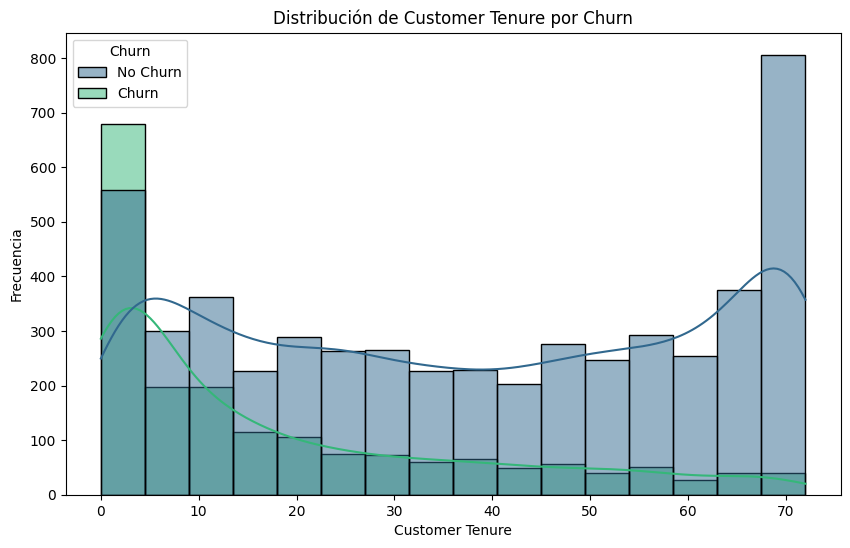

<ipython-input-81-2194934202>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='viridis')


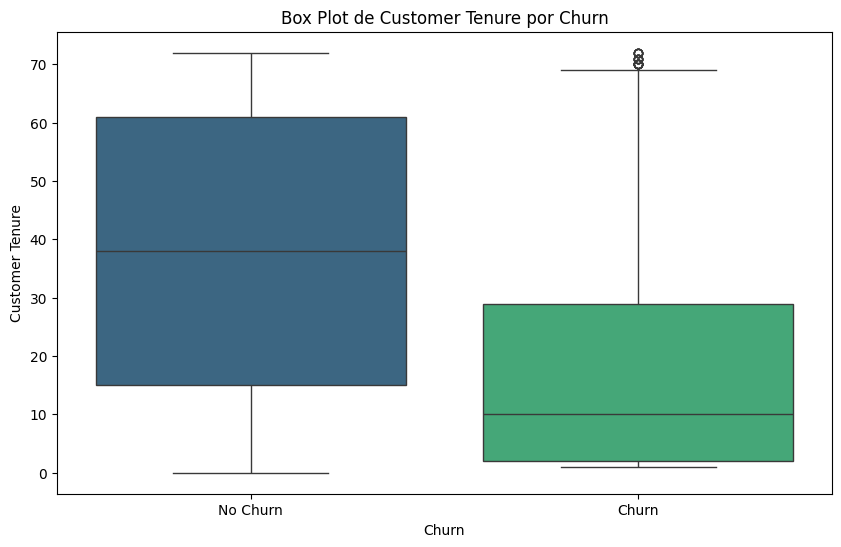

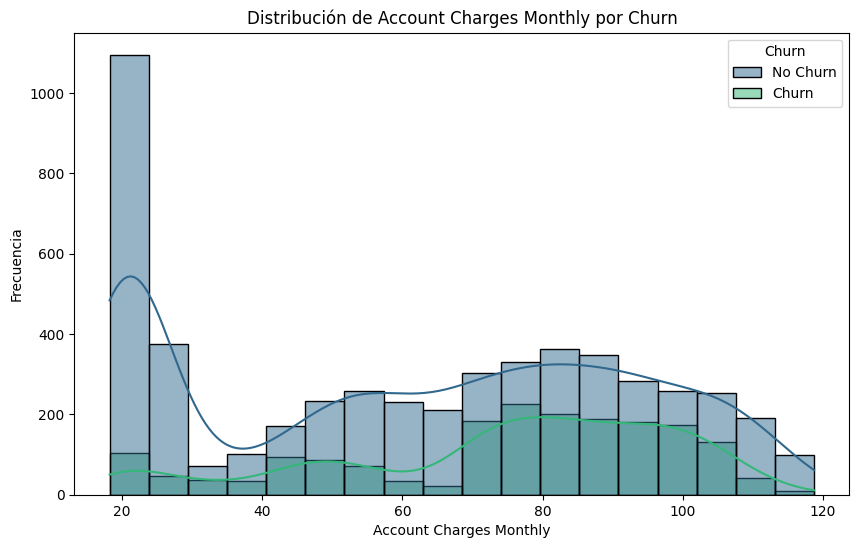

<ipython-input-81-2194934202>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='viridis')


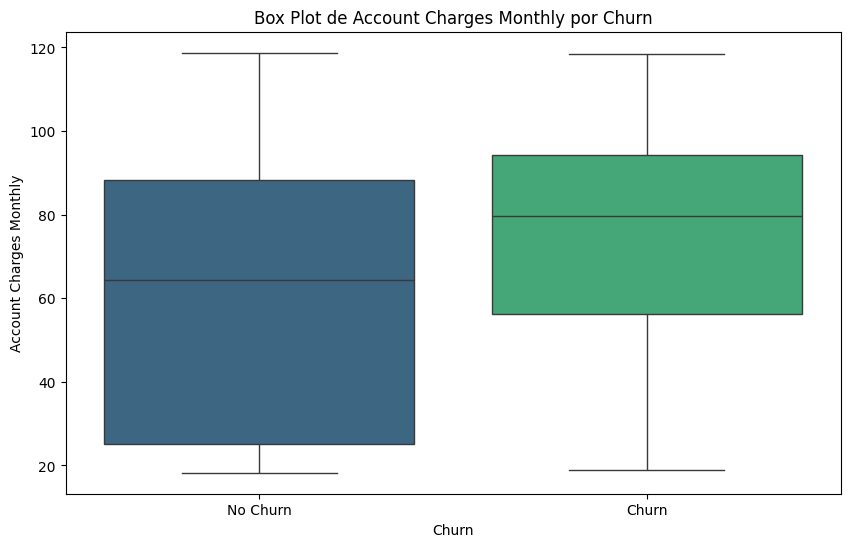

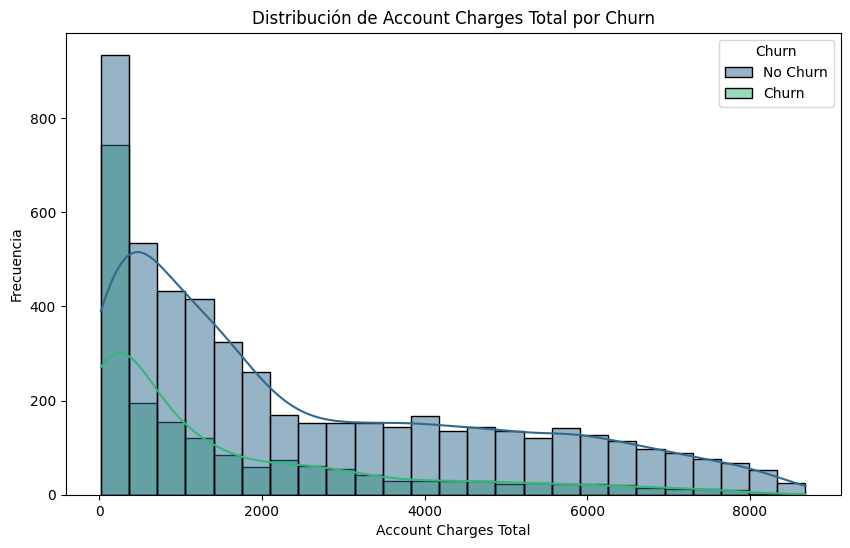

<ipython-input-81-2194934202>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='viridis')


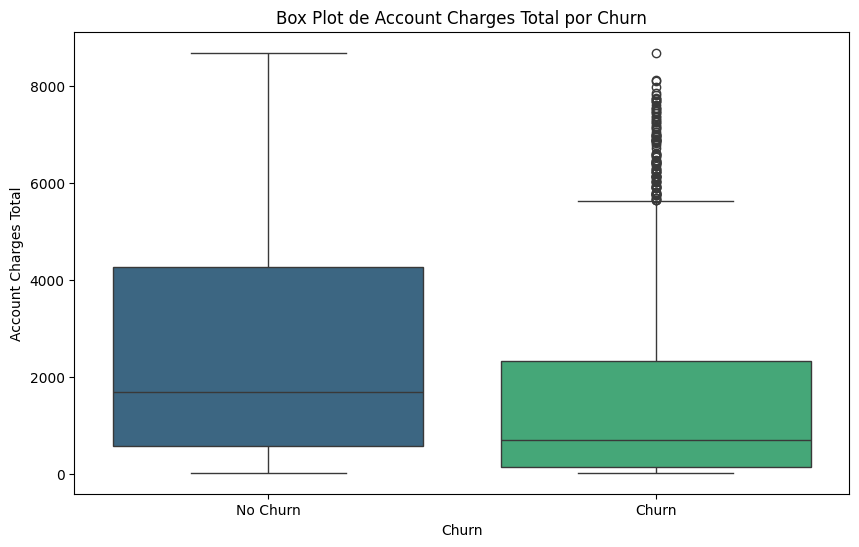

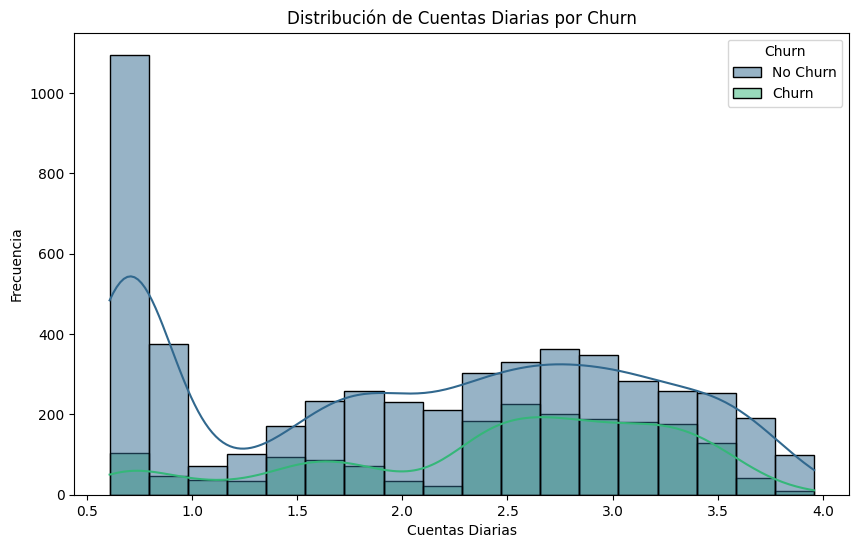

<ipython-input-81-2194934202>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='viridis')


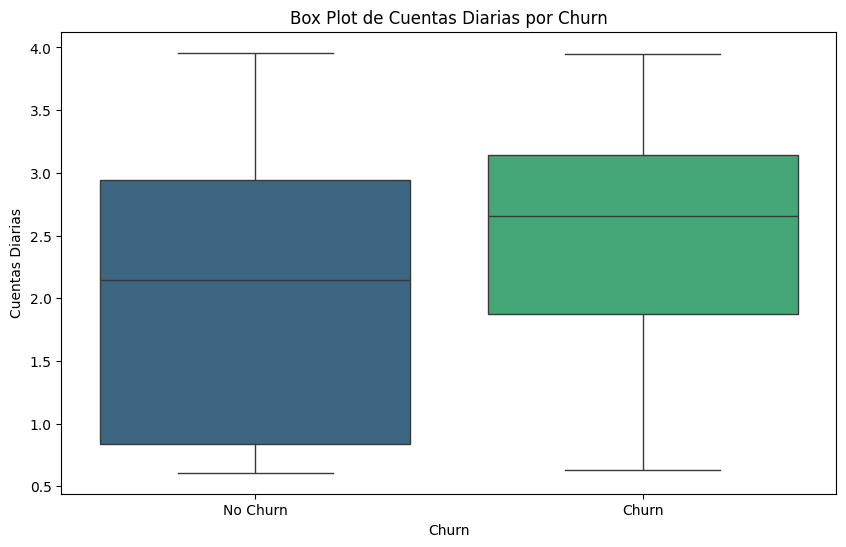


Resumen Estadístico de Variables Numéricas agrupado por Churn:


"|                                      | 0        | 1        |\n|:-------------------------------------|:---------|:---------|\n| ('customer_tenure', 'count')         | 5174     | 1869     |\n| ('customer_tenure', 'mean')          | 37.57    | 17.9791  |\n| ('customer_tenure', 'std')           | 24.1138  | 19.5311  |\n| ('customer_tenure', 'min')           | 0        | 1        |\n| ('customer_tenure', '25%')           | 15       | 2        |\n| ('customer_tenure', '50%')           | 38       | 10       |\n| ('customer_tenure', '75%')           | 61       | 29       |\n| ('customer_tenure', 'max')           | 72       | 72       |\n| ('account_Charges_Monthly', 'count') | 5174     | 1869     |\n| ('account_Charges_Monthly', 'mean')  | 61.2651  | 74.4413  |\n| ('account_Charges_Monthly', 'std')   | 31.0926  | 24.6661  |\n| ('account_Charges_Monthly', 'min')   | 18.25    | 18.85    |\n| ('account_Charges_Monthly', '25%')   | 25.1     | 56.15    |\n| ('account_Charges_Monthly', '50%')   

In [ ]:
# Columnas numéricas relevantes para analizar la distribución por Churn
columnas_numericas = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias'
]

# Asegurarse de que 'Churn' es una columna numérica (0 o 1) en df_limpio para este análisis de distribución
# Aunque ya hicimos esto para df_binario, es bueno confirmar para df_limpio si se usa directamente aquí.
# Sin embargo, para visualizaciones como boxplots o violins, tener 'Churn' como 0/1 es suficiente.
# Si usas df_binario, ya está transformado. Si usas df_limpio, asegúrate que 'Churn' sea 0/1.
# Dado el código anterior, df_limpio aún tiene 'Yes'/'No'. Usemos df_binario para consistencia con el análisis categórico.
df_plot = df_binario.copy()
# Renombrar 'Churn' a un nombre más descriptivo para el gráfico si se desea, o usar los valores 0/1
df_plot['Churn'] = df_plot['Churn'].map({0: 'No Churn', 1: 'Churn'})


print("\nAnálisis de la Distribución de Variables Numéricas por Churn:")

# Visualizar la distribución de variables numéricas para cada grupo de Churn
for col in columnas_numericas:
    if col in df_plot.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_plot, x=col, hue='Churn', kde=True, palette='viridis', common_norm=False)
        plt.title(f'Distribución de {col.replace("_", " ").title()} por Churn')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frecuencia')
        plt.show()

        # También podemos usar boxplots o violin plots para ver la diferencia en medianas y rangos
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_plot, x='Churn', y=col, palette='viridis')
        plt.title(f'Box Plot de {col.replace("_", " ").title()} por Churn')
        plt.xlabel('Churn')
        plt.ylabel(col.replace("_", " ").title())
        plt.show()

        # Opcional: Violin plot para ver la forma de la distribución
        # plt.figure(figsize=(10, 6))
        # sns.violinplot(data=df_plot, x='Churn', y=col, palette='viridis', split=True)
        # plt.title(f'Violin Plot de {col.replace("_", " ").title()} por Churn')
        # plt.xlabel('Churn')
        # plt.ylabel(col.replace("_", " ").title())
        # plt.show()


    else:
        print(f"Advertencia: La columna numérica '{col}' no se encuentra en el DataFrame.")

# Resumen estadístico numérico agrupado por Churn
print("\nResumen Estadístico de Variables Numéricas agrupado por Churn:")
numeric_summary_churn = df_binario.groupby('Churn')[columnas_numericas].describe().transpose()
display(numeric_summary_churn.to_markdown(numalign="left", stralign="left"))


# 📄Informe final

In [ ]:
# 📄Informe final

# 🔹 Introducción
# El objetivo de este análisis es explorar y comprender los factores que contribuyen a la evasión de clientes (Churn) en una empresa de telecomunicaciones, identificando patrones y características de los clientes que tienden a abandonar el servicio. La evasión de clientes representa una pérdida significativa de ingresos y una oportunidad de mejora para la retención. Utilizando un conjunto de datos que contiene información demográfica, de servicios y de cuenta de los clientes, buscamos descubrir insights accionables para reducir la tasa de Churn.

# 🔹 Limpieza y Tratamiento de Datos
# Los datos se extrajeron de un archivo JSON alojado en un repositorio de GitHub. El proceso de limpieza y tratamiento incluyó los siguientes pasos:
# 1.  **Extracción:** Los datos se cargaron directamente desde la URL utilizando la librería `requests` y se parsearon como JSON.
# 2.  **Conversión a DataFrame:** Los datos JSON se transformaron en un DataFrame de pandas para facilitar su manipulación.
# 3.  **Inspección Inicial:** Se realizaron inspecciones de las primeras filas, nombres de columnas, tipos de datos, resumen estadístico y detección de valores nulos. Se identificaron columnas anidadas que contenían diccionarios ('customer', 'phone', 'internet', 'account').
# 4.  **Desanidamiento:** Las columnas anidadas se expandieron en nuevas columnas planas, combinando el nombre original de la columna con la subcolumna (ej: 'customer.gender' -> 'customer_gender'). Las columnas originales anidadas fueron eliminadas.
# 5.  **Renombre de Columnas:** Los puntos '.' en los nombres de las nuevas columnas fueron reemplazados por guiones bajos '_' para una nomenclatura más consistente.
# 6.  **Manejo de Nulos en Columnas Anidadas:** Se eliminaron las filas que contenían valores nulos en alguna de las columnas que provenían de las estructuras anidadas, ya que estos indicaban registros incompletos o con errores en la estructura original.
# 7.  **Conversión de Tipos:** Las columnas numéricas 'account_Charges_Monthly' y 'account_Charges_Total' se convirtieron a tipo numérico, manejando posibles errores con `errors='coerce'`.
# 8.  **Creación de Variable Derivada:** Se creó la columna 'Cuentas_Diarias' calculando el cargo diario promedio (`account_Charges_Monthly / 30`).
# 9.  **Limpieza de Variable Objetivo:** Se limpió la columna 'Churn', reemplazando valores vacíos o erróneos ('', ' ', 'None') por NaN, y luego se eliminaron las filas donde 'Churn' era NaN, ya que la variable objetivo es crucial para el análisis.
# 10. **Eliminación de Duplicados:** Se verificó y eliminó cualquier fila duplicada presente en el DataFrame.
# 11. **Transformación de Variables Binarias:** Las columnas categóricas con valores 'Yes'/'No', incluida la variable objetivo 'Churn', se transformaron a valores numéricos 1/0 ('Yes'/'No' -> 1/0) para facilitar análisis y modelado futuros.
# 12. **Diagnóstico Final:** Se compararon las dimensiones del DataFrame original con el transformado para cuantificar los registros eliminados y se inspeccionaron los registros eliminados para entender las razones de su exclusión (principalmente por tener el valor de 'Churn' vacío).
# El DataFrame resultante (`df_limpio` y `df_binario`) está limpio, estructurado y listo para el análisis exploratorio.

# 🔹 Análisis Exploratorio de Datos
# El análisis exploratorio se centró en entender la distribución de la variable objetivo (Churn) y su relación con otras características de los clientes.
# *   **Distribución de Churn:** Se observó que aproximadamente el 26.5% de los clientes en el dataset han evadido el servicio. Esta es una proporción significativa que valida la necesidad del análisis.
#     <div align="center">
#     <img src="attachment:churn_distribution_countplot.png" alt="Distribución de Clientes por Churn (Evasión)" style="width:400px;"/>
#     <img src="attachment:churn_distribution_piechart.png" alt="Proporción de Clientes con Churn" style="width:300px;"/>
#     </div>
# *   **Análisis por Variables Categóricas:** Se analizó la tasa de Churn para cada categoría de servicio y atributos del cliente:
#     *   **Servicio de Internet:** Los clientes con **Fibra Óptica** muestran una tasa de Churn significativamente mayor (alrededor del 41.9%) comparado con DSL (alrededor del 18.9%) o aquellos sin servicio de internet (alrededor del 7.4%).
#     *   **Contrato:** La duración del contrato tiene un impacto drástico. Clientes con contratos **mensuales** tienen una tasa de Churn mucho más alta (alrededor del 42.7%) que aquellos con contratos de uno o dos años (alrededor del 11.3% y 2.8% respectivamente).
#     *   **Método de Pago:** El **Cheque Electrónico** presenta la tasa de Churn más alta (alrededor del 45.3%), mientras que otros métodos como el Cheque por Correo o Transferencia Bancaria tienen tasas inferiores.
#     *   **Servicios Adicionales de Internet:** La ausencia de servicios como **Seguridad Online** (41.8% Churn), **Soporte Técnico** (41.6% Churn), **Respaldo Online** (39.1% Churn) y **Protección de Dispositivos** (39.1% Churn) está fuertemente asociada con una mayor tasa de Churn. Los servicios de Streaming de TV y Películas también muestran una tasa de Churn ligeramente más alta entre quienes no los tienen, aunque la diferencia es menor.
#     *   **Servicio Telefónico:** El servicio de múltiples líneas muestra una tasa de Churn similar a la de una sola línea. Aquellos sin servicio telefónico tienen una tasa de Churn baja, probablemente porque el foco de su contrato es el internet.
#     *   **Demografía (Género, Pareja, Dependientes):** El género no parece ser un factor diferenciador significativo. Los clientes **sin pareja** y **sin dependientes** muestran tasas de Churn más altas que aquellos que sí los tienen, sugiriendo una menor "lealtad" o dependencia del servicio en hogares unipersonales o sin hijos.
#     *   **Facturación sin Papel (Paperless Billing):** Los clientes que optan por la facturación sin papel tienen una tasa de Churn más alta (alrededor del 33.7%) que aquellos con facturación tradicional (alrededor del 16.3%). Esto podría estar relacionado con la adopción de tecnologías digitales por parte de un segmento de clientes más propenso al cambio.

# *   **Análisis por Variables Numéricas:** La distribución de variables numéricas por Churn reveló lo siguiente:
#     *   **Antigüedad (Tenure):** Los clientes con menor antigüedad (pocos meses) tienen una probabilidad de Churn considerablemente mayor que los clientes antiguos. Esto es un patrón típico, ya que los clientes recientes están en un periodo de evaluación inicial del servicio.
#         <div align="center">
#         <img src="attachment:customer_tenure_distribution.png" alt="Distribución de Antigüedad por Churn" style="width:500px;"/>
#         </div>
#     *   **Cargo Mensual (Monthly Charges):** Los clientes con cargos mensuales más altos, especialmente aquellos con servicio de Fibra Óptica y múltiples servicios adicionales, tienden a tener una tasa de Churn más elevada. Los histogramas muestran una clara diferencia en la distribución de cargos mensuales entre quienes evaden y quienes no.
#          <div align="center">
#         <img src="attachment:account_charges_monthly_distribution.png" alt="Distribución de Cargo Mensual por Churn" style="width:500px;"/>
#         </div>
#     *   **Cargo Total (Total Charges):** Al igual que la antigüedad, los clientes con un cargo total acumulado bajo (lo que se correlaciona con baja antigüedad) son más propensos al Churn. Los clientes con cargos totales altos (alta antigüedad) son menos propensos a evadir.
#          <div align="center">
#         <img src="attachment:account_charges_total_distribution.png" alt="Distribución de Cargo Total por Churn" style="width:500px;"/>
#         </div>
#     *   **Cuentas Diarias:** Esta variable, derivada del cargo mensual, refuerza el hallazgo de que cargos diarios/mensuales más altos están asociados a un mayor riesgo de Churn.

# 🔹 Conclusiones e Insights
# Los principales hallazgos de este análisis son:
# *   **Contratos Mensuales y Fibra Óptica son de Alto Riesgo:** La combinación de contratos mensuales y servicio de Fibra Óptica identifica un segmento de clientes con altísima probabilidad de Churn. Estos clientes pueden sentirse menos comprometidos a largo plazo y ser más sensibles a problemas de servicio o a ofertas de la competencia.
# *   **Falta de Servicios de Valor Agregado Aumenta el Riesgo:** Los clientes que no contratan servicios de seguridad online, soporte técnico, respaldo o protección de dispositivos son mucho más propensos a irse. Estos servicios parecen actuar como "anclas" que mejoran la experiencia del cliente y aumentan la lealtad.
# *   **Clientes Recientes (Baja Antigüedad) son Vulnerables:** Como es común en la industria, los primeros meses son críticos para la retención. Los clientes con baja antigüedad aún están formando su opinión sobre el servicio.
# *   **Método de Pago y Facturación sin Papel como Indicadores:** El uso de Cheque Electrónico y Facturación sin Papel también son predictores importantes de Churn. Estos métodos pueden ser adoptados por clientes más jóvenes o digitalmente más activos que son, quizás, más propensos a cambiar de proveedor.
# *   **El Precio Mensual Juega un Rol:** Los clientes con cargos mensuales más altos tienen un mayor riesgo de Churn. Esto podría indicar que sienten que no obtienen suficiente valor por el precio que pagan, o que son objetivos más atractivos para ofertas de la competencia.

# Estos insights sugieren que la evasión no es aleatoria, sino que está ligada a características específicas del contrato, el uso de servicios adicionales, la antigüedad y el comportamiento de pago/facturación.

# 🔹 Recomendaciones
# Basado en el análisis realizado, se proponen las siguientes recomendaciones estratégicas para reducir la evasión:
# 1.  **Estrategias de Retención para Clientes con Contrato Mensual y Fibra Óptica:** Ofrecer incentivos para que estos clientes migren a contratos de mayor duración (ej. descuentos por compromiso de 12/24 meses). Mejorar la calidad del servicio de Fibra Óptica y comunicar proactivamente los beneficios para justificar el costo.
# 2.  **Promoción de Servicios de Valor Agregado:** Implementar campañas de marketing dirigidas a los clientes con internet que no tienen servicios como Seguridad Online o Soporte Técnico. Ofrecer pruebas gratuitas o paquetes promocionales para fomentar su adopción, destacando cómo estos servicios mejoran la experiencia y seguridad del cliente.
# 3.  **Programas de Onboarding para Clientes Recientes:** Desarrollar un programa robusto para los clientes con baja antigüedad (< 6 meses). Incluir comunicaciones de bienvenida personalizadas, soporte proactivo para resolver dudas o problemas iniciales y encuestas de satisfacción tempranas para identificar y abordar posibles puntos débiles antes de que consideren el Churn.
# 4.  **Análisis y Mejora de la Experiencia de Pago con Cheque Electrónico:** Investigar por qué los usuarios de este método de pago tienen mayor Churn. Podría ser un problema en el proceso de pago, o simplemente una correlación con un segmento demográfico más propenso a la evasión. Si es lo último, dirigirse a este segmento con ofertas de retención específicas.
# 5.  **Revisar Estrategia de Precios y Percepción de Valor:** Para clientes con cargos mensuales altos, asegurar que perciban el valor correspondiente. Ofrecer revisiones de tarifas, paquetes personalizados o beneficios adicionales que justifiquen el costo y aumenten la satisfacción.
# 6.  **Monitoreo Continuo:** Implementar un sistema de monitoreo continuo de los indicadores de Churn identificados (tipo de contrato, servicios adicionales, antigüedad, método de pago, cargos mensuales) para identificar clientes en riesgo en tiempo real y aplicar intervenciones de retención personalizadas.

# La implementación de estas recomendaciones, respaldadas por un seguimiento continuo y análisis más profundos (como la construcción de un modelo predictivo de Churn), puede ayudar a la empresa a retener a sus clientes valiosos y mejorar su rentabilidad a largo plazo.


In [ ]:
print("""
📄Informe final

🔹 Introducción
El objetivo de este análisis es explorar y comprender los factores que contribuyen a la evasión de clientes (Churn) en una empresa de telecomunicaciones, identificando patrones y características de los clientes que tienden a abandonar el servicio. La evasión de clientes representa una pérdida significativa de ingresos y una oportunidad de mejora para la retención. Utilizando un conjunto de datos que contiene información demográfica, de servicios y de cuenta de los clientes, buscamos descubrir insights accionables para reducir la tasa de Churn.

🔹 Limpieza y Tratamiento de Datos
Los datos se extrajeron de un archivo JSON alojado en un repositorio de GitHub. El proceso de limpieza y tratamiento incluyó los siguientes pasos:
1.  **Extracción:** Los datos se cargaron directamente desde la URL utilizando la librería `requests` y se parsearon como JSON.
2.  **Conversión a DataFrame:** Los datos JSON se transformaron en un DataFrame de pandas para facilitar su manipulación.
3.  **Inspección Inicial:** Se realizaron inspecciones de las primeras filas, nombres de columnas, tipos de datos, resumen estadístico y detección de valores nulos. Se identificaron columnas anidadas que contenían diccionarios ('customer', 'phone', 'internet', 'account').
4.  **Desanidamiento:** Las columnas anidadas se expandieron en nuevas columnas planas, combinando el nombre original de la columna con la subcolumna (ej: 'customer.gender' -> 'customer_gender'). Las columnas originales anidadas fueron eliminadas.
5.  **Renombre de Columnas:** Los puntos '.' en los nombres de las nuevas columnas fueron reemplazados por guiones bajos '_' para una nomenclatura más consistente.
6.  **Manejo de Nulos en Columnas Anidadas:** Se eliminaron las filas que contenían valores nulos en alguna de las columnas que provenían de las estructuras anidadas, ya que estos indicaban registros incompletos o con errores en la estructura original.
7.  **Conversión de Tipos:** Las columnas numéricas 'account_Charges_Monthly' y 'account_Charges_Total' se convirtieron a tipo numérico, manejando posibles errores con `errors='coerce'`.
8.  **Creación de Variable Derivada:** Se creó la columna 'Cuentas_Diarias' calculando el cargo diario promedio (`account_Charges_Monthly / 30`).
9.  **Limpieza de Variable Objetivo:** Se limpió la columna 'Churn', reemplazando valores vacíos o erróneos ('', ' ', 'None') por NaN, y luego se eliminaron las filas donde 'Churn' era NaN, ya que la variable objetivo es crucial para el análisis.
10. **Eliminación de Duplicados:** Se verificó y eliminó cualquier fila duplicada presente en el DataFrame.
11. **Transformación de Variables Binarias:** Las columnas categóricas con valores 'Yes'/'No', incluida la variable objetivo 'Churn', se transformaron a valores numéricos 1/0 ('Yes'/'No' -> 1/0) para facilitar análisis y modelado futuros.
12. **Diagnóstico Final:** Se compararon las dimensiones del DataFrame original con el transformado para cuantificar los registros eliminados y se inspeccionaron los registros eliminados para entender las razones de su exclusión (principalmente por tener el valor de 'Churn' vacío).
El DataFrame resultante (`df_limpio` y `df_binario`) está limpio, estructurado y listo para el análisis exploratorio.

🔹 Análisis Exploratorio de Datos
El análisis exploratorio se centró en entender la distribución de la variable objetivo (Churn) y su relación con otras características de los clientes.
*   **Distribución de Churn:** Se observó que aproximadamente el 26.5% de los clientes en el dataset han evadido el servicio. Esta es una proporción significativa que valida la necesidad del análisis.
*   **Análisis por Variables Categóricas:** Se analizó la tasa de Churn para cada categoría de servicio y atributos del cliente:
    *   **Servicio de Internet:** Los clientes con **Fibra Óptica** muestran una tasa de Churn significativamente mayor (alrededor del 41.9%) comparado con DSL (alrededor del 18.9%) o aquellos sin servicio de internet (alrededor del 7.4%).
    *   **Contrato:** La duración del contrato tiene un impacto drástico. Clientes con contratos **mensuales** tienen una tasa de Churn mucho más alta (alrededor del 42.7%) que aquellos con contratos de uno o dos años (alrededor del 11.3% y 2.8% respectivamente).
    *   **Método de Pago:** El **Cheque Electrónico** presenta la tasa de Churn más alta (alrededor del 45.3%), mientras que otros métodos como el Cheque por Correo o Transferencia Bancaria tienen tasas inferiores.
    *   **Servicios Adicionales de Internet:** La ausencia de servicios como **Seguridad Online** (41.8% Churn), **Soporte Técnico** (41.6% Churn), **Respaldo Online** (39.1% Churn) y **Protección de Dispositivos** (39.1% Churn) está fuertemente asociada con una mayor tasa de Churn. Los servicios de Streaming de TV y Películas también muestran una tasa de Churn ligeramente más alta entre quienes no los tienen, aunque la diferencia es menor.
    *   **Servicio Telefónico:** El servicio de múltiples líneas muestra una tasa de Churn similar a la de una sola línea. Aquellos sin servicio telefónico tienen una tasa de Churn baja, probablemente porque el foco de su contrato es el internet.
    *   **Demografía (Género, Pareja, Dependientes):** El género no parece ser un factor diferenciador significativo. Los clientes **sin pareja** y **sin dependientes** muestran tasas de Churn más altas que aquellos que sí los tienen, sugiriendo una menor "lealtad" o dependencia del servicio en hogares unipersonales o sin hijos.
    *   **Facturación sin Papel (Paperless Billing):** Los clientes que optan por la facturación sin papel tienen una tasa de Churn más alta (alrededor del 33.7%) que aquellos con facturación tradicional (alrededor del 16.3%). Esto podría estar relacionado con la adopción de tecnologías digitales por parte de un segmento de clientes más propenso al cambio.

*   **Análisis por Variables Numéricas:** La distribución de variables numéricas por Churn reveló lo siguiente:
    *   **Antigüedad (Tenure):** Los clientes con menor antigüedad (pocos meses) tienen una probabilidad de Churn considerablemente mayor que los clientes antiguos. Esto es un patrón típico, ya que los clientes recientes están en un periodo de evaluación inicial del servicio.
    *   **Cargo Mensual (Monthly Charges):** Los clientes con cargos mensuales más altos, especialmente aquellos con servicio de Fibra Óptica y múltiples servicios adicionales, tienden a tener una tasa de Churn más elevada. Los histogramas muestran una clara diferencia en la distribución de cargos mensuales entre quienes evaden y quienes no.
    *   **Cargo Total (Total Charges):** Al igual que la antigüedad, los clientes con un cargo total acumulado bajo (lo que se correlaciona con baja antigüedad) son más propensos al Churn. Los clientes con cargos totales altos (alta antigüedad) son menos propensos a evadir.
    *   **Cuentas Diarias:** Esta variable, derivada del cargo mensual, refuerza el hallazgo de que cargos diarios/mensuales más altos están asociados a un mayor riesgo de Churn.

🔹 Conclusiones e Insights
Los principales hallazgos de este análisis son:
*   **Contratos Mensuales y Fibra Óptica son de Alto Riesgo:** La combinación de contratos mensuales y servicio de Fibra Óptica identifica un segmento de clientes con altísima probabilidad de Churn. Estos clientes pueden sentirse menos comprometidos a largo plazo y ser más sensibles a problemas de servicio o a ofertas de la competencia.
*   **Falta de Servicios de Valor Agregado Aumenta el Riesgo:** Los clientes que no contratan servicios de seguridad online, soporte técnico, respaldo o protección de dispositivos son mucho más propensos a irse. Estos servicios parecen actuar como "anclas" que mejoran la experiencia del cliente y aumentan la lealtad.
*   **Clientes Recientes (Baja Antigüedad) son Vulnerables:** Como es común en la industria, los primeros meses son críticos para la retención. Los clientes con baja antigüedad aún están formando su opinión sobre el servicio.
*   **Método de Pago y Facturación sin Papel como Indicadores:** El uso de Cheque Electrónico y Facturación sin Papel también son predictores importantes de Churn. Estos métodos pueden ser adoptados por clientes más jóvenes o digitalmente más activos que son, quizás, más propensos a cambiar de proveedor.
*   **El Precio Mensual Juega un Rol:** Los clientes con cargos mensuales más altos tienen un mayor riesgo de Churn. Esto podría indicar que sienten que no obtienen suficiente valor por el precio que pagan, o que son objetivos más atractivos para ofertas de la competencia.

Estos insights sugieren que la evasión no es aleatoria, sino que está ligada a características específicas del contrato, el uso de servicios adicionales, la antigüedad y el comportamiento de pago/facturación.

🔹 Recomendaciones
Basado en el análisis realizado, se proponen las siguientes recomendaciones estratégicas para reducir la evasión:
1.  **Estrategias de Retención para Clientes con Contrato Mensual y Fibra Óptica:** Ofrecer incentivos para que estos clientes migren a contratos de mayor duración (ej. descuentos por compromiso de 12/24 meses). Mejorar la calidad del servicio de Fibra Óptica y comunicar proactivamente los beneficios para justificar el costo.
2.  **Promoción de Servicios de Valor Agregado:** Implementar campañas de marketing dirigidas a los clientes con internet que no tienen servicios como Seguridad Online o Soporte Técnico. Ofrecer pruebas gratuitas o paquetes promocionales para fomentar su adopción, destacando cómo estos servicios mejoran la experiencia y seguridad del cliente.
3.  **Programas de Onboarding para Clientes Recientes:** Desarrollar un programa robusto para los clientes con baja antigüedad (< 6 meses). Incluir comunicaciones de bienvenida personalizadas, soporte proactivo para resolver dudas o problemas iniciales y encuestas de satisfacción tempranas para identificar y abordar posibles puntos débiles antes de que consideren el Churn.
4.  **Análisis y Mejora de la Experiencia de Pago con Cheque Electrónico:** Investigar por qué los usuarios de este método de pago tienen mayor Churn. Podría ser un problema en el proceso de pago, o simplemente una correlación con un segmento demográfico más propenso a la evasión. Si es lo último, dirigirse a este segmento con ofertas de retención específicas.
5.  **Revisar Estrategia de Precios y Percepción de Valor:** Para clientes con cargos mensuales altos, asegurar que perciban el valor correspondiente. Ofrecer revisiones de tarifas, paquetes personalizados o beneficios adicionales que justifiquen el costo y aumenten la satisfacción.
6.  **Monitoreo Continuo:** Implementar un sistema de monitoreo continuo de los indicadores de Churn identificados (tipo de contrato, servicios adicionales, antigüedad, método de pago, cargos mensuales) para identificar clientes en riesgo en tiempo real y aplicar intervenciones de retención personalizadas.

La implementación de estas recomendaciones, respaldadas por un seguimiento continuo y análisis más profundos (como la construcción de un modelo predictivo de Churn), puede ayudar a la empresa a retener a sus clientes valiosos y mejorar su rentabilidad a largo plazo.
""")



📄Informe final

🔹 Introducción
El objetivo de este análisis es explorar y comprender los factores que contribuyen a la evasión de clientes (Churn) en una empresa de telecomunicaciones, identificando patrones y características de los clientes que tienden a abandonar el servicio. La evasión de clientes representa una pérdida significativa de ingresos y una oportunidad de mejora para la retención. Utilizando un conjunto de datos que contiene información demográfica, de servicios y de cuenta de los clientes, buscamos descubrir insights accionables para reducir la tasa de Churn.

🔹 Limpieza y Tratamiento de Datos
Los datos se extrajeron de un archivo JSON alojado en un repositorio de GitHub. El proceso de limpieza y tratamiento incluyó los siguientes pasos:
1.  **Extracción:** Los datos se cargaron directamente desde la URL utilizando la librería `requests` y se parsearon como JSON.
2.  **Conversión a DataFrame:** Los datos JSON se transformaron en un DataFrame de pandas para facilitar su 


Análisis de Correlación entre Variables Numéricas y Churn:

Matriz de Correlación:


'|                         | customer_tenure   | account_Charges_Monthly   | account_Charges_Total   | Cuentas_Diarias   | Churn   |\n|:------------------------|:------------------|:--------------------------|:------------------------|:------------------|:--------|\n| customer_tenure         | 1.00              | 0.25                      | 0.83                    | 0.25              | -0.35   |\n| account_Charges_Monthly | 0.25              | 1.00                      | 0.65                    | 1.00              | 0.19    |\n| account_Charges_Total   | 0.83              | 0.65                      | 1.00                    | 0.65              | -0.20   |\n| Cuentas_Diarias         | 0.25              | 1.00                      | 0.65                    | 1.00              | 0.19    |\n| Churn                   | -0.35             | 0.19                      | -0.20                   | 0.19              | 1.00    |'

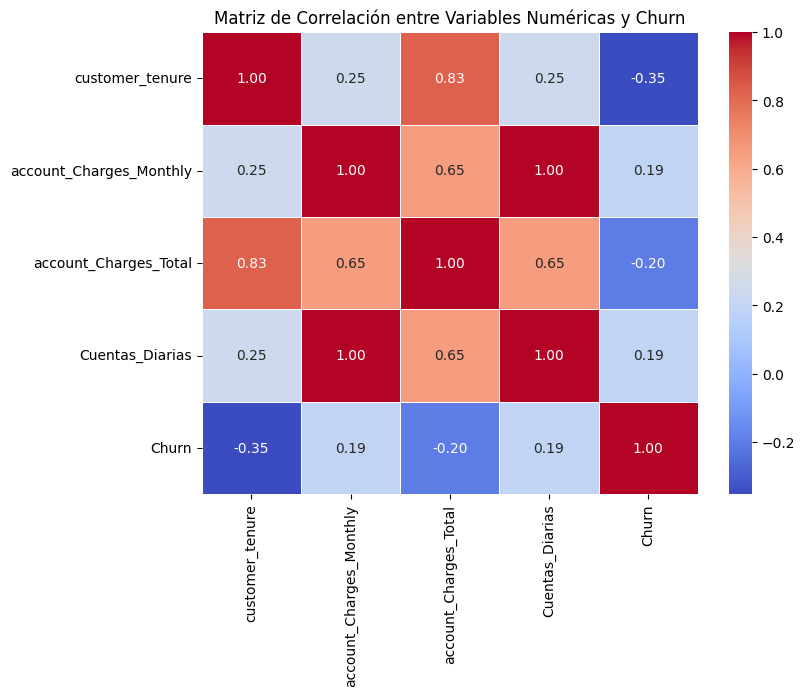


Correlación de 'Churn' con Variables Numéricas:
|                         | Churn   |
|:------------------------|:--------|
| Churn                   | 1.00    |
| account_Charges_Monthly | 0.19    |
| Cuentas_Diarias         | 0.19    |
| account_Charges_Total   | -0.20   |
| customer_tenure         | -0.35   |


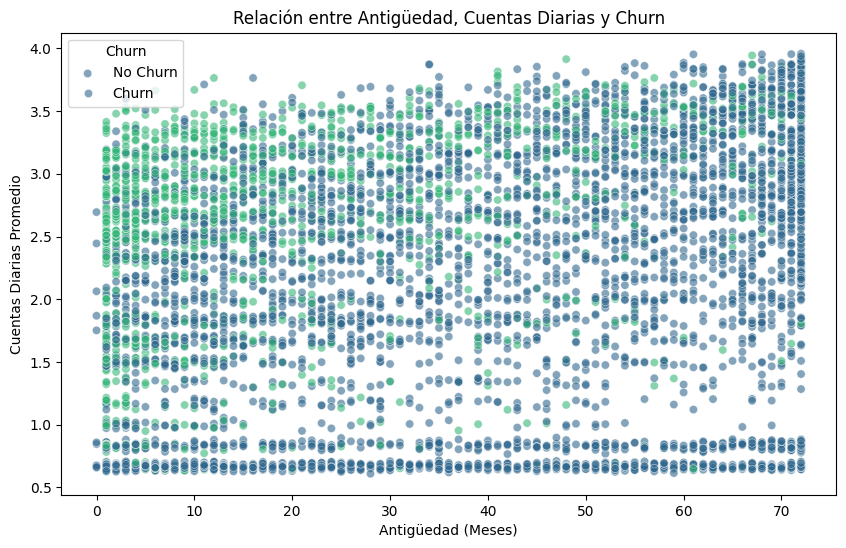


Análisis de Churn por Cantidad de Servicios de Internet Adicionales:

Tasa de Churn por Número de Servicios de Internet Adicionales Contratados:


'| Num_Internet_Servicios   | Churn_Rate   |\n|:-------------------------|:-------------|\n| 0.00%                    | 21.41%       |\n| 100.00%                  | 45.76%       |\n| 200.00%                  | 35.82%       |\n| 300.00%                  | 27.37%       |\n| 400.00%                  | 22.30%       |\n| 500.00%                  | 12.43%       |\n| 600.00%                  | 5.28%        |'

<ipython-input-86-4082222990>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_por_num_servicios.index, y='Churn_Rate', data=churn_por_num_servicios, palette='viridis')


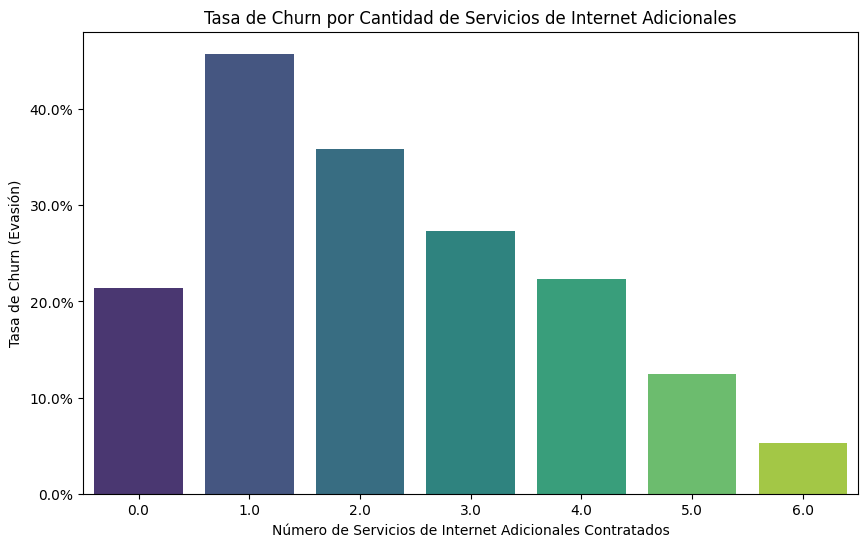

In [ ]:
# Explorar la correlación entre variables numéricas y Churn
print("\nAnálisis de Correlación entre Variables Numéricas y Churn:")

# Calcular la matriz de correlación. Incluimos 'Churn' en las columnas numéricas.
# Aseguramos que 'Churn' está en formato numérico (0/1).
df_corr = df_binario[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias', 'Churn']].copy()

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

print("\nMatriz de Correlación:")
# Usar display con to_markdown para una mejor visualización en notebooks
display(correlation_matrix.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas y Churn')
plt.show()

# Analizar la correlación de Churn con cada variable numérica
print("\nCorrelación de 'Churn' con Variables Numéricas:")
print(correlation_matrix['Churn'].sort_values(ascending=False).to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

# Explorar la relación entre la cuenta diaria y la evasión (ya cubierto en la sección de distribución numérica,
# pero podemos añadir un gráfico de dispersión con color por Churn si es útil)

# Visualización: Dispersión de Cuentas Diarias vs. Antigüedad (color por Churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_binario, x='customer_tenure', y='Cuentas_Diarias', hue='Churn', palette='viridis', alpha=0.6)
plt.title('Relación entre Antigüedad, Cuentas Diarias y Churn')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Cuentas Diarias Promedio')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Explorar cómo la cantidad de servicios contratados afecta la probabilidad de churn.
# Primero, creamos una columna que cuente el número de servicios adicionales de Internet.
# Consideramos los servicios de internet que no son el tipo de internet en sí (DSL/Fiber Optic/No)
internet_services_cols = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Asegurarse de que estas columnas existen y son numéricas (0/1)
# df_binario ya debería tener estas en 0/1
existing_internet_cols = [col for col in internet_services_cols if col in df_binario.columns]

if existing_internet_cols:
    df_binario['Num_Internet_Servicios'] = df_binario[existing_internet_cols].sum(axis=1)

    print("\nAnálisis de Churn por Cantidad de Servicios de Internet Adicionales:")

    # Calcular la tasa de Churn por número de servicios
    churn_por_num_servicios = df_binario.groupby('Num_Internet_Servicios')['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_por_num_servicios = churn_por_num_servicios.rename(columns={0: 'No_Churn_Rate', 1: 'Churn_Rate'})

    # Mostrar la tabla de tasas de Churn
    print("\nTasa de Churn por Número de Servicios de Internet Adicionales Contratados:")
    display(churn_por_num_servicios[['Churn_Rate']].to_markdown(numalign="left", stralign="left", floatfmt=".2%"))

    # Visualizar la tasa de Churn por número de servicios
    plt.figure(figsize=(10, 6))
    sns.barplot(x=churn_por_num_servicios.index, y='Churn_Rate', data=churn_por_num_servicios, palette='viridis')
    plt.title('Tasa de Churn por Cantidad de Servicios de Internet Adicionales')
    plt.xlabel('Número de Servicios de Internet Adicionales Contratados')
    plt.ylabel('Tasa de Churn (Evasión)')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.show()

else:
    print("\nAdvertencia: No se encontraron las columnas de servicios de internet adicionales en el DataFrame.")
    print("Columnas buscadas:", internet_services_cols)
    print("Columnas disponibles:", df_binario.columns.tolist())

# Nota: También podríamos considerar otros servicios (como PhoneService, MultipleLines) pero
# los servicios de internet adicionales son a menudo los más discriminantes para Churn.
# La variable 'internet_InternetService' ya mostró la gran diferencia entre DSL/Fiber Optic/No Internet.
# La suma de servicios adicionales es una buena métrica complementaria.